In [428]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy.stats import mstats
import seaborn as sns

In [2]:
pd.options.mode.chained_assignment = None

In [3]:
df = pd.read_json("scout_car.json", lines = True)

In [4]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_info_rows', 500)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.width', 2000)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   url                            object 
 1   make_model                     object 
 2   short_description              object 
 3   body_type                      object 
 4   price                          int64  
 5   vat                            object 
 6   km                             object 
 7   registration                   object 
 8   prev_owner                     object 
 9   kW                             float64
 10  hp                             object 
 11  Type                           object 
 12  Previous Owners                object 
 13  Next Inspection                object 
 14  Inspection new                 object 
 15  Warranty                       object 
 16  Full Service                   object 
 17  Non-smoking Vehicle            object 
 18  null  

In [6]:
missing_vals = (df.isnull().sum()/df.shape[0])*100
missing_vals

url                                0.000000
make_model                         0.000000
short_description                  0.288963
body_type                          0.376908
price                              0.000000
vat                               28.349771
km                                 0.000000
registration                       0.000000
prev_owner                        42.892141
kW                               100.000000
hp                                 0.000000
Type                               0.012564
Previous Owners                   41.711163
Next Inspection                   77.793831
Inspection new                    75.299956
Warranty                          34.047365
Full Service                      48.395000
Non-smoking Vehicle               54.915510
null                               0.000000
Make                               0.000000
Model                              0.000000
Offer Number                      19.944720
First Registration              

In [7]:
def show_nan(dataframe, limit):
    miss = (df.isnull().sum()/df.shape[0])*100
    return miss[miss>limit]

In [8]:
show_nan(df, 35)

prev_owner                        42.892141
kW                               100.000000
Previous Owners                   41.711163
Next Inspection                   77.793831
Inspection new                    75.299956
Full Service                      48.395000
Non-smoking Vehicle               54.915510
Paint Type                        36.258559
Model Code                        68.729192
Cylinders                         35.680633
Weight                            43.809285
Drive chain                       43.080596
Emission Label                    74.967021
Country version                   52.346253
Electricity consumption           99.139393
Last Service Date                 96.444500
Other Fuel Types                  94.472015
Availability                      96.011056
Last Timing Belt Service Date     99.899491
Available from                    98.291350
dtype: float64

In [9]:
df.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat', 'km', 'registration', 'prev_owner', 'kW', 'hp', 'Type', 'Previous Owners', 'Next Inspection', 'Inspection new', 'Warranty', 'Full Service', 'Non-smoking Vehicle', 'null', 'Make', 'Model', 'Offer Number', 'First Registration', 'Body Color', 'Paint Type', 'Body Color Original', 'Upholstery', 'Body', 'Nr. of Doors', 'Nr. of Seats', 'Model Code', 'Gearing Type', 'Displacement', 'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption', 'CO2 Emission', 'Emission Class', '\nComfort & Convenience\n', '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n', 'description', 'Emission Label', 'Gears', 'Country version', 'Electricity consumption', 'Last Service Date', 'Other Fuel Types', 'Availability', 'Last Timing Belt Service Date', 'Available from'], dtype='object')

In [10]:
col_nm = ['url',
 'make_model',
 'short_description',
 'body_type',
 'price',
 'vat',
 'km',
 'registration',
 'prev_owner',
 'kw',
 'hp',
 'type',
 'previous_owners',
 'next_inspection',
 'inspection_new',
 'warranty',
 'full_service',
 'non-smoking_vehicle',
 'null',
 'make',
 'model',
 'offer_number',
 'first_registration',
 'body_color',
 'paint_type',
 'body_color_original',
 'upholstery',
 'body',
 'nr_of_doors',
 'nr_of_seats',
 'model_code',
 'gearing_type',
 'displacement',
 'cylinders',
 'weight',
 'drive_chain',
 'fuel',
 'consumption',
 'co2_emission',
 'emission_class',
 'comfort&convenience',
 'entertainment&media',
 'extras',
 'safety&security',
 'description',
 'emission_label',
 'gears',
 'country_version',
 'electricity_consumption',
 'last_service_date',
 'other_fuel_types',
 'availability',
 'last_timing_belt_service_date',
 'available_from']

In [11]:
len(list(df.columns))

54

In [12]:
df.set_axis(col_nm, axis = 1, inplace = True)

In [13]:
df.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat', 'km', 'registration', 'prev_owner', 'kw', 'hp', 'type', 'previous_owners', 'next_inspection', 'inspection_new', 'warranty', 'full_service', 'non-smoking_vehicle', 'null', 'make', 'model', 'offer_number', 'first_registration', 'body_color', 'paint_type', 'body_color_original', 'upholstery', 'body', 'nr_of_doors', 'nr_of_seats', 'model_code', 'gearing_type', 'displacement', 'cylinders', 'weight', 'drive_chain', 'fuel', 'consumption', 'co2_emission', 'emission_class', 'comfort&convenience', 'entertainment&media', 'extras', 'safety&security', 'description', 'emission_label', 'gears', 'country_version', 'electricity_consumption', 'last_service_date', 'other_fuel_types', 'availability', 'last_timing_belt_service_date', 'available_from'], dtype='object')

In [14]:
drop_cols = ['availability', 'available_from', 'electricity_consumption', 'last_service_date', 
             'last_timing_belt_service_date', 'other_fuel_types', 'kw']

In [15]:
df.drop(drop_cols, axis = 1, inplace = True)

In [16]:
def fill_most(df, group_col, col_name):
    for group in list(df[group_col].unique()):
        grp_inx = list(df[df[group_col] == group][col_name].index)
        df[col_name].iloc[grp_inx] = df[col_name].iloc[grp_inx].fillna(df[df[group_col] == group][col_name].mode()[0])

In [17]:
def list_extractor(lst):
    return ','.join([i.strip() if type(lst)==list else i.strip() for i in lst])

In [18]:
pd.pandas.set_option('display.max_columns', None)

In [19]:
df.drop("url", axis = 1, inplace = True)

In [20]:
def name_splitter(name):
    return name.split()[0] if len(name.split())>1 else name

In [21]:
df["make"] = df["make_model"].apply(name_splitter)

In [22]:
df.drop("null", axis = 1, inplace = True)

In [23]:
def model_extractor(model_list):
    try:
        return model_list[1]
    except TypeError:
        return model_list

In [24]:
df["model"] = df["model"].apply(model_extractor)

In [25]:
df["body_color"] = df["body_color"].apply(model_extractor)

In [26]:
df.previous_owners.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


\n1\n                                                                                        8101
NaN                                                                                          6640
\n2\n                                                                                         766
\n0\n                                                                                         163
\n3\n                                                                                          17
                                                                                             ... 
[\n1\n, \n181 g CO2/km (comb)\n]                                                                1
[\n1\n, \n, 6.1 l/100 km (comb), \n, 7.7 l/100 km (city), \n, 5.2 l/100 km (country), \n]       1
[\n1\n, \n, 5.9 l/100 km (comb), \n, 7.9 l/100 km (city), \n, 4.8 l/100 km (country), \n]       1
[\n1\n, \n, 5.9 l/100 km (comb), \n, 7.6 l/100 km (city), \n, 4.9 l/100 km (country), \n]       1
[\n1\n, \n102 g CO2/

In [27]:
def prev_ext(item):
    return item[0].strip("\n") if type(item) == list else item[1]

In [28]:
df.prev_owner.value_counts(dropna = False)

1 previous owner     8294
NaN                  6828
2 previous owners     778
3 previous owners      17
4 previous owners       2
Name: prev_owner, dtype: int64

In [29]:
def owner_extractor(data):
    return data[0][1] if type(data) == list else data[1]

In [30]:
df["previous_owners"] = df.previous_owners[df.previous_owners.notnull()].apply(owner_extractor)

In [31]:
df.previous_owners.value_counts(dropna = False)

1      8294
NaN    6640
2       778
0       188
3        17
4         2
Name: previous_owners, dtype: int64

In [32]:
df["previous_owners"] = df["previous_owners"].astype('float')

In [33]:
df.previous_owners.value_counts(dropna = False)

1.0    8294
NaN    6640
2.0     778
0.0     188
3.0      17
4.0       2
Name: previous_owners, dtype: int64

In [34]:
df.upholstery.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nCloth, Black\n]           5821
NaN                          3720
[\nPart leather, Black\n]    1121
[\nCloth\n]                  1005
[\nCloth, Grey\n]             891
[\nCloth, Other\n]            639
[\nFull leather, Black\n]     575
[\nBlack\n]                   491
[\nGrey\n]                    273
[\nOther, Other\n]            182
[\nPart leather\n]            140
[\nFull leather\n]            139
[\nFull leather, Brown\n]     116
[\nPart leather, Grey\n]      116
[\nOther, Black\n]            110
[\nFull leather, Other\n]      72
[\nFull leather, Grey\n]       67
[\nPart leather, Other\n]      65
[\nOther\n]                    56
[\nPart leather, Brown\n]      50
[\nalcantara, Black\n]         47
[\nVelour, Black\n]            36
[\nFull leather, Beige\n]      36
[\nCloth, Brown\n]             28
[\nVelour\n]                   16
[\nOther, Grey\n]              15
[\nCloth, Beige\n]             13
[\nCloth, Blue\n]              12
[\nBrown\n]                    12
[\nVelour, Gre

In [35]:
df.type.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[, Used, , Diesel (Particulate Filter)]                                                                                  3475
[, Used, , Diesel]                                                                                                       2516
[, Used, , Gasoline]                                                                                                     2367
[, Used, , Super 95]                                                                                                     1818
[, Pre-registered, , Super 95]                                                                                            500
                                                                                                                         ... 
[, Used, , Regular/Benzine E10 91 / Super E10 95 / Super Plus E10 98 / Super Plus 98 / Super 95 / Regular/Benzine 91]       1
[, Used, , Regular/Benzine E10 91 / Regular/Benzine 91 / Super 95 / Super Plus 98 / Super E10 95 / Super Plus E10 98] 

In [36]:
def type_extractor(data):
    new_lst = []
    for i in data:
        if i != '':
            new_lst.append(i.strip().strip("\n"))
    return ",".join(new_lst)

In [37]:
df.type.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[, Used, , Diesel (Particulate Filter)]                                                                                  3475
[, Used, , Diesel]                                                                                                       2516
[, Used, , Gasoline]                                                                                                     2367
[, Used, , Super 95]                                                                                                     1818
[, Pre-registered, , Super 95]                                                                                            500
                                                                                                                         ... 
[, Used, , Regular/Benzine E10 91 / Super E10 95 / Super Plus E10 98 / Super Plus 98 / Super 95 / Regular/Benzine 91]       1
[, Used, , Regular/Benzine E10 91 / Regular/Benzine 91 / Super 95 / Super Plus 98 / Super E10 95 / Super Plus E10 98] 

In [38]:
df.previous_owners

0        2.0
1        NaN
2        1.0
3        1.0
4        1.0
        ... 
15914    NaN
15915    1.0
15916    1.0
15917    NaN
15918    1.0
Name: previous_owners, Length: 15919, dtype: float64

In [39]:
df.prev_owner = df.prev_owner.str[0]

In [40]:
df.prev_owner.fillna(method = 'bfill').value_counts(dropna = False)

1    14692
2     1187
3       38
4        2
Name: prev_owner, dtype: int64

In [41]:
df.previous_owners.fillna(method = 'bfill').value_counts(dropna = False)

1.0    14169
2.0     1179
0.0      531
3.0       38
4.0        2
Name: previous_owners, dtype: int64

In [42]:
df.previous_owners.fillna(method = 'bfill', inplace = True)

In [43]:
df.drop(columns=['prev_owner', 'weight', 'non-smoking_vehicle'], inplace = True)

In [44]:
df.body_type.value_counts(dropna = False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [45]:
df.body.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Sedans, \n]           7903
[\n, Station wagon, \n]    3553
[\n, Compact, \n]          3153
[\n, Van, \n]               783
[\n, Other, \n]             290
[\n, Transporter, \n]        88
NaN                          60
[\n, Off-Road, \n]           56
[\n, Coupe, \n]              25
[\n, Convertible, \n]         8
Name: body, dtype: int64

In [46]:
df.groupby('make_model')["body_type"].value_counts(dropna = False)

make_model      body_type    
Audi A1         Sedans           1538
                Compact          1039
                Station wagon      21
                Other              13
                Coupe               2
                Van                 1
Audi A2         Off-Road            1
Audi A3         Sedans           2598
                Station wagon     282
                Compact           182
                Other              16
                Convertible         8
                NaN                 7
                Coupe               4
Opel Astra      Station wagon    1211
                Sedans           1053
                Compact           185
                Other              67
                NaN                 7
                Coupe               2
                Off-Road            1
Opel Corsa      Compact          1230
                Sedans            875
                Other              87
                Coupe              13
                Tran

In [47]:
fill_most(df, "make_model", "body_type")

In [48]:
df.body_type.value_counts(dropna = False)

Sedans           7925
Station wagon    3563
Compact          3155
Van               809
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [49]:
df.drop(columns='body', inplace = True)

In [50]:
df.inspection_new.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                            11987
[\nYes\n, \nEuro 6\n]                                                                            523
\nYes\n                                                                                          362
[\nYes\n, \n102 g CO2/km (comb)\n]                                                               174
[\nYes\n, \n4 (Green)\n]                                                                         166
                                                                                               ...  
[\nYes\n, \n1 (No sticker)\n]                                                                      1
[\nYes\n, \n, 5.2 l/100 km (comb), \n, 6.6 l/100 km (city), \n, 4.3 l/100 km (country), \n]        1
[\nYes\n, \n, 5.7 l/100 km (comb), \n, 7.3 l/100 km (city), \n, 4.9 l/100 km (country), \n]        1
[\nYes\n, \n, 5.2 l/100 km (comb), \n, 6.8 l/100 km (city), \n, 4.3 l/100 km (country), \n]

In [51]:
df.inspection_new[15900]

'\nYes\n'

In [52]:
def inspec_ext(item):
    return item[0].strip("\n") if type(item) == list else item.strip().strip('\n')

In [53]:
df["inspection_new"] = df.inspection_new[df.inspection_new.notnull()].apply(inspec_ext)

In [54]:
df.inspection_new.value_counts(dropna = False)

NaN    11987
Yes     3932
Name: inspection_new, dtype: int64

In [55]:
df.inspection_new.fillna(value = "No", inplace = True)

In [56]:
df['inspection_new'] = df.inspection_new.map({'Yes':1, 'No':'0'})

In [57]:
df.inspection_new.value_counts(dropna = False)

0    11987
1     3932
Name: inspection_new, dtype: int64

In [58]:
df.next_inspection.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                                12384
\n04/2022\n                                                                                           62
\n03/2021\n                                                                                           38
\n03/2022\n                                                                                           36
\n06/2021\n                                                                                           34
                                                                                                   ...  
[\n10/2020\n, \n, 4.2 l/100 km (comb), \n, 5 l/100 km (city), \n, 3.7 l/100 km (country), \n]          1
[\n05/2022\n, \nEuro 6d-TEMP\n]                                                                        1
[\n03/2021\n, \n, 5.6 l/100 km (comb), \n, 7.2 l/100 km (city), \n, 4.7 l/100 km (country), \n]        1
[\n05/2020\n, \n4 (Green)\n]                           

In [59]:
def lst_to_str(data):
    new_lst = []
    if type(data) == list:
        for i in data:
            new_lst.append(i.strip())
        return ",".join(new_lst)
    else:
        return data

In [60]:
df.next_inspection = df.next_inspection[df.next_inspection.notnull()].apply(lst_to_str)

In [61]:
df.next_inspection.value_counts(dropna = False)

NaN                            12384
\n04/2022\n                       62
\n03/2021\n                       38
\n03/2022\n                       36
\n06/2021\n                       34
                               ...  
06/2019,150 g CO2/km (comb)        1
10/2021,104 g CO2/km (comb)        1
08/2020,143 g CO2/km (comb)        1
04/2021,103 g CO2/km (comb)        1
04/2020,Euro 6                     1
Name: next_inspection, Length: 1400, dtype: int64

In [62]:
df['next_inspection'] = df.next_inspection.str.extract("(\d\d/\d\d\d\d)")

In [63]:
df.next_inspection.value_counts(dropna = False)

NaN        12384
06/2021      471
03/2021      210
05/2021      180
04/2021      171
           ...  
02/2017        1
05/2014        1
04/2016        1
12/2022        1
05/2017        1
Name: next_inspection, Length: 78, dtype: int64

In [64]:
df.next_inspection = pd.to_datetime(df.next_inspection, format = '%m/%Y')

In [65]:
(df.paint_type.isnull().sum()/len(df.paint_type))*100

36.25855895470821

In [66]:
df.paint_type.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nMetallic\n]       9794
NaN                  5772
[\nUni/basic\n]       347
[\nPerl effect\n]       6
Name: paint_type, dtype: int64

In [67]:
df.paint_type.str[0].str.strip('\n').value_counts(dropna = False)

Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: paint_type, dtype: int64

In [68]:
df.paint_type = df.paint_type.str[0].str.strip('\n')

In [69]:
df.paint_type.value_counts(dropna = False)

Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: paint_type, dtype: int64

In [70]:
(df.country_version.isnull().sum()/len(df.country_version))*100

52.346252905333245

In [71]:
df.country_version.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                     8333
[\nGermany\n]           4502
[\nItaly\n]             1038
[\nEuropean Union\n]     507
[\nNetherlands\n]        464
[\nSpain\n]              325
[\nBelgium\n]            314
[\nAustria\n]            208
[\nCzech Republic\n]      52
[\nPoland\n]              49
[\nFrance\n]              38
[\nDenmark\n]             33
[\nHungary\n]             28
[\nJapan\n]                8
[\nSlovakia\n]             4
[\nCroatia\n]              4
[\nSweden\n]               3
[\nRomania\n]              2
[\nBulgaria\n]             2
[\nSerbia\n]               1
[\nLuxembourg\n]           1
[\nSwitzerland\n]          1
[\nSlovenia\n]             1
[\nEgypt\n]                1
Name: country_version, dtype: int64

In [72]:
df.country_version = df.country_version.str[0].str.strip('\n')

In [73]:
df.country_version.value_counts(dropna = False)

NaN               8333
Germany           4502
Italy             1038
European Union     507
Netherlands        464
Spain              325
Belgium            314
Austria            208
Czech Republic      52
Poland              49
France              38
Denmark             33
Hungary             28
Japan                8
Croatia              4
Slovakia             4
Sweden               3
Romania              2
Bulgaria             2
Slovenia             1
Switzerland          1
Serbia               1
Egypt                1
Luxembourg           1
Name: country_version, dtype: int64

In [74]:
(df.cylinders.isnull().sum()/len(df.cylinders))*100

35.68063320560337

In [75]:
df.cylinders.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n4\n]    8105
NaN        5680
[\n3\n]    2104
[\n5\n]      22
[\n6\n]       3
[\n2\n]       2
[\n8\n]       2
[\n1\n]       1
Name: cylinders, dtype: int64

In [76]:
df.cylinders.str[0].str.strip('\n').value_counts(dropna = False)

4      8105
NaN    5680
3      2104
5        22
6         3
8         2
2         2
1         1
Name: cylinders, dtype: int64

In [77]:
df.cylinders = df.cylinders.str[0].str.strip('\n')

In [78]:
df.cylinders.value_counts(dropna = False)

4      8105
NaN    5680
3      2104
5        22
6         3
8         2
2         2
1         1
Name: cylinders, dtype: int64

In [79]:
df.emission_label.isnull().sum()/df.shape[0]

0.749670205414913

In [80]:
df.emission_label.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                     11934
[\n4 (Green)\n]          3553
[\n1 (No sticker)\n]      381
[[], [], []]               40
[\n5 (Blue)\n]              8
[\n3 (Yellow)\n]            2
[\n2 (Red)\n]               1
Name: emission_label, dtype: int64

In [81]:
df.emission_label.str[0].str.strip('\n').value_counts(dropna = False)

NaN               11974
4 (Green)          3553
1 (No sticker)      381
5 (Blue)              8
3 (Yellow)            2
2 (Red)               1
Name: emission_label, dtype: int64

In [82]:
df.emission_label = df.emission_label.str[0].str.strip('\n')

In [83]:
df.emission_label.value_counts(dropna = False)

NaN               11974
4 (Green)          3553
1 (No sticker)      381
5 (Blue)              8
3 (Yellow)            2
2 (Red)               1
Name: emission_label, dtype: int64

In [84]:
df.full_service.isnull().sum()/df.shape[0]

0.4839499968590992

In [85]:
df.full_service.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                           7704
[\n, \n, \n4 (Green)\n]                                                                       2235
[\n, \n, \nEuro 6\n]                                                                          2097
[\n, \n]                                                                                      1702
[\n, \n, \nEuro 6d-TEMP\n]                                                                     399
                                                                                              ... 
[\n, \n, \n, 4.3 l/100 km (comb), \n, 5.2 l/100 km (city), \n, 3.9 l/100 km (country), \n]       1
[\n, \n, \n, 4.6 l/100 km (comb), \n, 5.8 l/100 km (city), \n, 3.9 l/100 km (country), \n]       1
[\n, \n, \nEuro 4\n]                                                                             1
[\n, \n, \n, 6.6 l/100 km (comb), \n, 8.4 l/100 km (city), \n, 5.6 l/100 km (country), \n]       1
[\n, \n, \

In [86]:
df.drop(columns = 'full_service', inplace = True)

In [87]:
df["comfort&convenience"].value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                                                                                                                                                                                                                                                                                                     920
[Air conditioning, Electrical side mirrors, Hill Holder, Power windows]                                                                                                                                                                                                                                                                                                 216
[Air conditioning, Electrical side mirrors, Power windows]                                                                                                                                                                                                                      

In [88]:
def unique_values(data, column_name):
    unique_vals = set()
    for rows in data[column_name]:
        unique_vals.update(rows)
    return list(unique_vals)

In [89]:
df[df['comfort&convenience'].isnull()]['comfort&convenience'].map({np.nan:[]})

9        []
30       []
53       []
168      []
191      []
         ..
15791    []
15804    []
15805    []
15854    []
15864    []
Name: comfort&convenience, Length: 920, dtype: object

In [90]:
def NaN_to_list(data, column_name):
    NaN_rows = data[column_name].isnull()
    data.loc[NaN_rows, column_name] = data.loc[NaN_rows, column_name].apply(lambda x: [])

In [91]:
NaN_to_list(df, 'comfort&convenience')
unique_values(df, 'comfort&convenience')

['Heated steering wheel',
 'Navigation system',
 'Start-stop system',
 'Multi-function steering wheel',
 'Electric tailgate',
 'Seat heating',
 'Air conditioning',
 'Light sensor',
 'Power windows',
 'Windshield',
 'Parking assist system sensors front',
 'Rain sensor',
 'Electric Starter',
 'Split rear seats',
 'Parking assist system sensors rear',
 'Sunroof',
 'Heads-up display',
 'Cruise control',
 'Keyless central door lock',
 'Lumbar support',
 'Park Distance Control',
 'Seat ventilation',
 'Electrically heated windshield',
 'Tinted windows',
 'Massage seats',
 'Armrest',
 'Leather seats',
 'Air suspension',
 'Wind deflector',
 'Auxiliary heating',
 'Electrical side mirrors',
 'Automatic climate control',
 'Parking assist system camera',
 'Panorama roof',
 'Electrically adjustable seats',
 'Leather steering wheel',
 'Hill Holder',
 'Parking assist system self-steering']

In [92]:
nxtins_list = [",".join(item).strip() if type(item) == list else item for item in df['comfort&convenience']]

In [93]:
df['comfort&convenience'] = nxtins_list

In [94]:
df['comfort&convenience'].value_counts(dropna = False)

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        920
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                          

In [95]:
df['comfort&convenience'] = df['comfort&convenience'].mask(df['comfort&convenience'] == '')

In [96]:
df['comfort&convenience'].isnull().sum()

920

In [97]:
df['comfort&convenience'].value_counts(dropna = False)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     920
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                          

In [98]:
fill_most(df, 'make_model', 'comfort&convenience')

In [99]:
df['comfort&convenience'].isnull().sum()

0

In [100]:
df['comfort&convenience'].str.get_dummies(sep=',')

,Air conditioning,Air suspension,Armrest,Automatic climate control,Auxiliary heating,Cruise control,Electric Starter,Electric tailgate,Electrical side mirrors,Electrically adjustable seats,Electrically heated windshield,Heads-up display,Heated steering wheel,Hill Holder,Keyless central door lock,Leather seats,Leather steering wheel,Light sensor,Lumbar support,Massage seats,Multi-function steering wheel,Navigation system,Panorama roof,Park Distance Control,Parking assist system camera,Parking assist system self-steering,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Seat ventilation,Split rear seats,Start-stop system,Sunroof,Tinted windows,Wind deflector,Windshield
0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0
2,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0
3,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0
4,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,1,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,1,0,1,0,0
15915,1,0,0,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0
15916,1,0,1,1,0,1,0,1,1,0,1,1,1,0,0,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,0,0,0
15917,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [101]:
df = df.join(df['comfort&convenience'].str.get_dummies(sep=',').add_prefix('cc_') )

In [102]:
df.shape

(15919, 78)

In [103]:
df['entertainment&media'].isnull().sum()/df.shape[0]

0.0863119542684842

In [104]:
df['entertainment&media'].value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                      1374
[Bluetooth, Hands-free equipment, On-board computer, Radio, USB]                         1282
[Bluetooth, Hands-free equipment, MP3, On-board computer, Radio, USB]                     982
[Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, USB]          783
[On-board computer, Radio]                                                                487
                                                                                         ... 
[Bluetooth, MP3, On-board computer, Sound system, USB]                                      1
[CD player, Hands-free equipment, On-board computer, Radio, Sound system, Television]       1
[Bluetooth, Digital radio, On-board computer, Sound system, USB]                            1
[CD player, Hands-free equipment, MP3, Radio, USB]                                          1
[CD player, Digital radio, Radio]                           

In [105]:
NaN_to_list(df, 'entertainment&media')

In [106]:
unique_values(df, 'entertainment&media')

['MP3',
 'CD player',
 'On-board computer',
 'Digital radio',
 'Sound system',
 'USB',
 'Hands-free equipment',
 'Television',
 'Radio',
 'Bluetooth']

In [107]:
ent_med_list = [",".join(item).strip() if type(item) == list else item for item in df['entertainment&media']]

In [108]:
df['entertainment&media'] = pd.DataFrame(ent_med_list)

In [109]:
df['entertainment&media'].value_counts(dropna = False)

                                                                                                    1374
Bluetooth,Hands-free equipment,On-board computer,Radio,USB                                          1282
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB                                       982
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB                             783
On-board computer,Radio                                                                              487
                                                                                                    ... 
Bluetooth,CD player,Digital radio,Hands-free equipment,USB                                             1
Bluetooth,Digital radio,Hands-free equipment,MP3,On-board computer,Sound system,Television,USB         1
CD player,Hands-free equipment,MP3,On-board computer,Radio,Sound system                                1
Bluetooth,CD player,Hands-free equipment,MP3,On-board c

In [110]:
df['entertainment&media'] = df['entertainment&media'].mask(df['entertainment&media'] == '')

In [111]:
df['entertainment&media'].value_counts(dropna = False)

NaN                                                                                                 1374
Bluetooth,Hands-free equipment,On-board computer,Radio,USB                                          1282
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB                                       982
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB                             783
On-board computer,Radio                                                                              487
                                                                                                    ... 
Bluetooth,CD player,Digital radio,Hands-free equipment,USB                                             1
Bluetooth,Digital radio,Hands-free equipment,MP3,On-board computer,Sound system,Television,USB         1
CD player,Hands-free equipment,MP3,On-board computer,Radio,Sound system                                1
Bluetooth,CD player,Hands-free equipment,MP3,On-board c

In [112]:
fill_most(df, 'make_model', 'entertainment&media')

In [113]:
df['entertainment&media'].value_counts(dropna = False)

Bluetooth,Hands-free equipment,On-board computer,Radio,USB                                          2015
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB                                      1206
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB                            1049
Bluetooth,Hands-free equipment,On-board computer,Radio                                               529
On-board computer,Radio                                                                              487
                                                                                                    ... 
Hands-free equipment,MP3,On-board computer,Sound system,USB                                            1
Bluetooth,Digital radio,Hands-free equipment,MP3,On-board computer,Sound system,Television,USB         1
Bluetooth,Digital radio,MP3,Radio                                                                      1
Digital radio,Sound system,USB                         

In [114]:
df['entertainment&media'].str.get_dummies(sep = ',')

,Bluetooth,CD player,Digital radio,Hands-free equipment,MP3,On-board computer,Radio,Sound system,Television,USB
0,1,0,0,1,0,1,1,0,0,0
1,1,0,0,1,0,1,1,1,0,0
2,0,0,0,0,1,1,0,0,0,0
3,1,1,0,1,1,1,1,1,0,1
4,1,1,0,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
15914,1,0,1,1,0,1,1,0,0,1
15915,1,0,1,1,0,0,1,0,0,1
15916,1,0,0,1,0,1,1,0,0,0
15917,1,0,1,0,0,0,1,0,0,1


In [115]:
df = df.join(df['entertainment&media'].str.get_dummies(sep = ',').add_prefix('em_'))

In [116]:
df.head()

,make_model,short_description,body_type,price,vat,km,registration,hp,type,previous_owners,next_inspection,inspection_new,warranty,make,model,offer_number,first_registration,body_color,paint_type,body_color_original,upholstery,nr_of_doors,nr_of_seats,model_code,gearing_type,displacement,cylinders,drive_chain,fuel,consumption,co2_emission,emission_class,comfort&convenience,entertainment&media,extras,safety&security,description,emission_label,gears,country_version,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,66 kW,"[, Used, , Diesel (Particulate Filter)]",2.0,2021-06-01,1,"[\n, \n, \n4 (Green)\n]",Audi,A1,[\nLR-062483\n],"[\n, 2016, \n]",Black,Metallic,[\nMythosschwarz\n],"[\nCloth, Black\n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",3,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Hill Holder,Leather steering wheel,Light sensor,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system","Bluetooth,Hands-free equipment,On-board computer,Radio","[Alloy wheels, Catalytic Converter, Voice Control]","[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]","[\n, Sicherheit:, , Deaktivierung für Beifahrer-Airbag, , ESC mit elektronischer Quersperre, , Tagfahrlicht, , Reifendruck-Kontrollanzeige, , Kopfairbag-System mit Seiten-Airbags vorn, , Sicherheitslenksäule, Assistenzsysteme:, , Berganfahrassistent, Komfort:, , Scheinwerferreinigung, , Xenon plus inklusive Scheinwerfer-Reinigungsanlage, , Scheinwerfer-Reinigungsanlage, , Einparkhilfe hinten, , Licht-/Regensensor, , Funkfernbedienung, , Elektrische Luftzusatzheizung, Interieur:...",NaN,NaN,NaN,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0
1,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,141 kW,"[, Used, , Gasoline]",1.0,NaT,0,NaN,Audi,A1,NaN,"[\n, 2017, \n]",Red,NaN,NaN,"[\nCloth, Grey\n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",4,[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)], [4.7 l/100 km (country)]]",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"Air conditioning,Automatic climate control,Hill Holder,Leather steering wheel,Lumbar support,Parking assist system sensors rear,Power windows,Start-stop system,Tinted windows","Bluetooth,Hands-free equipment,On-board computer,Radio,Sound system","[Alloy wheels, Sport seats, Sport suspension, Voice Control]","[ABS, Central door lock, Central door lock w

In [117]:
df['extras'].isnull().sum()/df.shape[0]

0.18606696400527672

In [118]:
df["extras"] = df[df["extras"].notnull()]["extras"].apply(list_extractor)

In [119]:
df['extras'].value_counts(dropna = False)

Alloy wheels                                                                                                3245
NaN                                                                                                         2962
Alloy wheels,Touch screen                                                                                    697
Alloy wheels,Voice Control                                                                                   577
Alloy wheels,Touch screen,Voice Control                                                                      541
                                                                                                            ... 
Sport seats,Sport suspension,Trailer hitch,Voice Control                                                       1
Sport seats,Sport suspension,Voice Control                                                                     1
Alloy wheels,Catalytic Converter,Shift paddles,Sport package,Sport suspension,Voice Control,Wint

In [120]:
fill_most(df, 'make_model', 'extras')

In [121]:
df.extras.value_counts(dropna = False)

Alloy wheels                                                                                            6174
Alloy wheels,Touch screen                                                                                697
Alloy wheels,Voice Control                                                                               577
Alloy wheels,Touch screen,Voice Control                                                                  541
Alloy wheels,Roof rack                                                                                   385
                                                                                                        ... 
Alloy wheels,Shift paddles,Sport seats,Sport suspension,Touch screen,Voice Control,Winter tyres            1
Roof rack,Trailer hitch,Voice Control                                                                      1
Alloy wheels,Catalytic Converter,Roof rack,Shift paddles,Sport suspension,Touch screen,Voice Control       1
Alloy wheels,Cab or

In [122]:
df = df.join(df['extras'].str.get_dummies(sep = ',').add_prefix('ex_'))

In [123]:
df.head()

,make_model,short_description,body_type,price,vat,km,registration,hp,type,previous_owners,next_inspection,inspection_new,warranty,make,model,offer_number,first_registration,body_color,paint_type,body_color_original,upholstery,nr_of_doors,nr_of_seats,model_code,gearing_type,displacement,cylinders,drive_chain,fuel,consumption,co2_emission,emission_class,comfort&convenience,entertainment&media,extras,safety&security,description,emission_label,gears,country_version,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,66 kW,"[, Used, , Diesel (Particulate Filter)]",2.0,2021-06-01,1,"[\n, \n, \n4 (Green)\n]",Audi,A1,[\nLR-062483\n],"[\n, 2016, \n]",Black,Metallic,[\nMythosschwarz\n],"[\nCloth, Black\n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",3,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Hill Holder,Leather steering wheel,Light sensor,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system","Bluetooth,Hands-free equipment,On-board computer,Radio","Alloy wheels,Catalytic Converter,Voice Control","[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]","[\n, Sicherheit:, , Deaktivierung für Beifahrer-Airbag, , ESC mit elektronischer Quersperre, , Tagfahrlicht, , Reifendruck-Kontrollanzeige, , Kopfairbag-System mit Seiten-Airbags vorn, , Sicherheitslenksäule, Assistenzsysteme:, , Berganfahrassistent, Komfort:, , Scheinwerferreinigung, , Xenon plus inklusive Scheinwerfer-Reinigungsanlage, , Scheinwerfer-Reinigungsanlage, , Einparkhilfe hinten, , Licht-/Regensensor, , Funkfernbedienung, , Elektrische Luftzusatzheizung, Interieur:...",NaN,NaN,NaN,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,141 kW,"[, Used, , Gasoline]",1.0,NaT,0,NaN,Audi,A1,NaN,"[\n, 2017, \n]",Red,NaN,NaN,"[\nCloth, Grey\n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",4,[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)], [4.7 l/100 km (country)]]",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"Air conditioning,Automatic climat

In [124]:
df['safety&security'].isnull().sum()/df.shape[0]

0.06168729191532132

In [125]:
df['safety&security'].value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                                                                                                                                                                                                                                                                                                                        982
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]                                                                                                                                                 538
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]            

In [126]:
df['safety&security'] = df[df['safety&security'].notnull()]['safety&security'].apply(list_extractor)

In [127]:
df['safety&security'].value_counts(dropna = False)

NaN                                                                                                                                                                                                                                                                                                                                               982
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                      538
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                           

In [128]:
fill_most(df, 'make_model', 'safety&security')

In [129]:
df['safety&security'].value_counts(dropna = False)

ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                              825
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                                         480
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,LED Daytime Running Lights,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                     

In [130]:
df['safety&security'].str.get_dummies(sep = ',')

,ABS,Adaptive Cruise Control,Adaptive headlights,Alarm system,Blind spot monitor,Central door lock,Central door lock with remote control,Daytime running lights,Driver drowsiness detection,Driver-side airbag,Electronic stability control,Emergency brake assistant,Emergency system,Fog lights,Head airbag,Immobilizer,Isofix,LED Daytime Running Lights,LED Headlights,Lane departure warning system,Night view assist,Passenger-side airbag,Power steering,Rear airbag,Side airbag,Tire pressure monitoring system,Traction control,Traffic sign recognition,Xenon headlights
0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1
1,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1
2,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0
3,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0
4,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,1,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0
15915,1,1,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,1,1,1,0
15916,1,1,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,0,1,1,0
15917,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,1,0,0,1,1,0,1,1,0,1,0


In [131]:
df = df.join(df['safety&security'].str.get_dummies(sep = ',').add_prefix('ss_'))

In [132]:
df.head()

,make_model,short_description,body_type,price,vat,km,registration,hp,type,previous_owners,next_inspection,inspection_new,warranty,make,model,offer_number,first_registration,body_color,paint_type,body_color_original,upholstery,nr_of_doors,nr_of_seats,model_code,gearing_type,displacement,cylinders,drive_chain,fuel,consumption,co2_emission,emission_class,comfort&convenience,entertainment&media,extras,safety&security,description,emission_label,gears,country_version,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
0,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,66 kW,"[, Used, , Diesel (Particulate Filter)]",2.0,2021-06-01,1,"[\n, \n, \n4 (Green)\n]",Audi,A1,[\nLR-062483\n],"[\n, 2016, \n]",Black,Metallic,[\nMythosschwarz\n],"[\nCloth, Black\n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",3,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Hill Holder,Leather steering wheel,Light sensor,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system","Bluetooth,Hands-free equipment,On-board computer,Radio","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control,Xenon headlights","[\n, Sicherheit:, , Deaktivierung für Beifahrer-Airbag, , ESC mit elektronischer Quersperre, , Tagfahrlicht, , Reifendruck-Kontrollanzeige, , Kopfairbag-System mit Seiten-Airbags vorn, , Sicherheitslenksäule, Assistenzsysteme:, , Berganfahrassistent, Komfort:, , Scheinwerferreinigung, , Xenon plus inklusive Scheinwerfer-Reinigungsanlage, , Scheinwerfer-Reinigungsanlage, , Einparkhilfe hinten, , Licht-/Regensensor, , Funkfern

In [133]:
df.shape

(15919, 134)

In [134]:
df.consumption.head()

0    [[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]
1    [[5.6 l/100 km (comb)], [7.1 l/100 km (city)], [4.7 l/100 km (country)]]
2    [[3.8 l/100 km (comb)], [4.4 l/100 km (city)], [3.4 l/100 km (country)]]
3    [[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]
4    [[4.1 l/100 km (comb)], [4.6 l/100 km (city)], [3.8 l/100 km (country)]]
Name: consumption, dtype: object

In [135]:
df['consumption'].isnull().sum()/df.shape[0]

0.11973113889063383

In [136]:
df.consumption.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                   1906
[[3.9 l/100 km (comb)], [4.1 l/100 km (city)], [3.7 l/100 km (country)]]               304
[[4.2 l/100 km (comb)], [5 l/100 km (city)], [3.7 l/100 km (country)]]                 276
[[5.4 l/100 km (comb)], [6.8 l/100 km (city)], [4.5 l/100 km (country)]]               257
[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]               253
                                                                                      ... 
[[3.6 l/100 km (comb)], [], [4.4 l/100 km (country)]]                                    1
[\n, 4.8 l/100 km (comb), \n, 5.6 l/100 km (city), \n, 4.3 l/100 km (country), \n]       1
[[7.6 l/100 km (comb)], [], []]                                                          1
[[5.6 l/100 km (comb)], [7.6 l/100 km (city)], [4.4 l/100 km (country)]]                 1
[\n, 4.7 l/100 km (comb), \n, \n, \n]                                                    1

In [137]:
df.consumption.sample(55)

5818               [[5.1 l/100 km (comb)], [6.3 l/100 km (city)], [4.3 l/100 km (country)]]
2890               [[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]
9037               [[5.3 l/100 km (comb)], [6.6 l/100 km (city)], [4.5 l/100 km (country)]]
8088               [[4.7 l/100 km (comb)], [5.5 l/100 km (city)], [4.1 l/100 km (country)]]
6621               [[5.6 l/100 km (comb)], [7.3 l/100 km (city)], [4.5 l/100 km (country)]]
2392               [[4.8 l/100 km (comb)], [5.9 l/100 km (city)], [4.2 l/100 km (country)]]
12265              [[5.3 l/100 km (comb)], [6.9 l/100 km (city)], [4.3 l/100 km (country)]]
1074                 [[4 l/100 km (comb)], [4.5 l/100 km (city)], [3.7 l/100 km (country)]]
2880               [[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]
5943               [[4.9 l/100 km (comb)], [6.2 l/100 km (city)], [4.2 l/100 km (country)]]
10492              [[3.8 l/100 km (comb)], [4.5 l/100 km (city)], [3.3 l/100 km 

In [138]:
df.consumption.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                   1906
[[3.9 l/100 km (comb)], [4.1 l/100 km (city)], [3.7 l/100 km (country)]]               304
[[4.2 l/100 km (comb)], [5 l/100 km (city)], [3.7 l/100 km (country)]]                 276
[[5.4 l/100 km (comb)], [6.8 l/100 km (city)], [4.5 l/100 km (country)]]               257
[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]               253
                                                                                      ... 
[[3.6 l/100 km (comb)], [], [4.4 l/100 km (country)]]                                    1
[\n, 4.8 l/100 km (comb), \n, 5.6 l/100 km (city), \n, 4.3 l/100 km (country), \n]       1
[[7.6 l/100 km (comb)], [], []]                                                          1
[[5.6 l/100 km (comb)], [7.6 l/100 km (city)], [4.4 l/100 km (country)]]                 1
[\n, 4.7 l/100 km (comb), \n, \n, \n]                                                    1

In [139]:
df.consumption.str[0].str[0].str.extract("(\d.\d|\d)")[0].unique()

array(['3.8', '5.6', '4.1', '3.5', '3.7', nan, '4', '4.9', '4.2', '4.5',
       '4.4', '4.3', '3', '3.6', '3.4', '3.9', '5.1', '5.2', '4.6', '4.8',
       '5.8', '4.7', '5', '1', '6', '5.9', '5.3', '5.5', '3.3', '3.2',
       '6.6', '8.3', '6.5', '7.1', '8.1', '5.4', '6.4', '6.7', '6.2',
       '7.3', '6.3', '5.7', '6.1', '6.8', '7.5', '7.4', '0', '7.8', '3.1',
       '6.9', '7', '7.2', '8', '9.1', '8.6', '8.7', '7.9', '1.2', '7.6'],
      dtype=object)

In [140]:
df.consumption.str[0].str[0].str.extract("(^\d+.\d*)")[0].unique()

array(['3.8', '5.6', '4.1', '3.5', '3.7', nan, '4 ', '4.9', '4.2', '4.5',
       '4.4', '4.3', '3 ', '3.6', '3.4', '3.9', '5.1', '5.2', '4.6',
       '4.8', '5.8', '4.7', '5 ', '43 ', '13.8', '6 ', '5.9', '51 ',
       '5.3', '5.5', '10 ', '3.3', '3.2', '6.6', '8.3', '6.5', '7.1',
       '8.1', '5.4', '40 ', '38 ', '6.4', '6.7', '6.2', '7.3', '6.3',
       '5.7', '6.1', '6.8', '7.5', '7.4', '0 ', '7.8', '3.1', '6.9', '7 ',
       '7.2', '8 ', '11 ', '9.1', '8.6', '8.7', '7.9', '55 ', '54 ',
       '1.2', '32 ', '33 ', '50 ', '1 ', '46 ', '7.6'], dtype=object)

In [141]:
df['consumption_comb'] = df.consumption.str[0].str[0].str.extract("(\d.\d.\d|\d.\d|\d)")

In [142]:
df.consumption_comb.value_counts(dropna = False)

NaN    2883
3.9     732
4       716
5.4     663
5.1     630
4.4     595
3.8     585
5.6     568
4.7     555
4.8     523
5       520
4.5     511
5.2     429
4.6     420
4.2     408
5.3     375
3.7     369
4.9     348
5.5     342
4.1     341
5.9     308
3.3     307
5.7     302
4.3     295
3.5     288
6       278
3.6     194
6.2     184
5.8     142
6.3     141
6.1     135
6.8     134
6.6     119
3.4     106
3        73
6.4      64
7.4      62
7.1      38
1        37
6.5      36
6.7      33
3.2      25
6.9      21
8.3      20
7.6      14
7         9
3.1       7
7.2       6
7.8       6
8         5
8.6       3
8.7       3
7.9       2
8.1       2
7.3       2
0         2
9.1       1
1.2       1
7.5       1
Name: consumption_comb, dtype: int64

In [143]:
df.consumption.str[1].value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                       1906
[5 l/100 km (city)]        642
[5.8 l/100 km (city)]      597
[4.5 l/100 km (city)]      577
[]                         516
                          ... 
[9.7 l/100 km (city)]        1
4.1 l/100 km (comb)          1
[64 l/100 km (city)]         1
[6.8 kg/100 km (city)]       1
7.9 l/100 km (comb)          1
Name: consumption, Length: 130, dtype: int64

In [144]:
df.consumption.str[1].str.extract("(\d.\d|\d)")[0].value_counts(dropna = False)

NaN    15069
5.4      107
5.9       61
6         53
5.6       50
4.7       47
4.9       45
6.3       40
5.7       40
6.1       40
5.5       38
6.2       32
5         32
6.6       29
4.4       28
4.2       27
5.1       27
5.2       25
4.8       23
5.8       22
4.5       12
4.3       12
6.4       11
6.7       10
6.5        7
6.9        6
4.6        6
5.3        5
7.4        4
1.6        3
6.8        2
8.6        1
4.1        1
3.9        1
7.9        1
4          1
7          1
Name: 0, dtype: int64

In [145]:
consumption1 = df.consumption.str[1].str.extract("(\d.\d|\d)")

In [146]:
df.consumption_comb.fillna(consumption1[0], inplace = True)

In [147]:
df.consumption.str[-2].value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                       1906
[5 l/100 km (city)]        642
[5.8 l/100 km (city)]      597
[4.5 l/100 km (city)]      577
[]                         516
                          ... 
[6.5 kg/100 km (city)]       1
6.1 l/100 km (country)       1
[9 l/100 km (city)]          1
[6.8 kg/100 km (city)]       1
[19.9 l/100 km (city)]       1
Name: consumption, Length: 121, dtype: int64

In [148]:
df.consumption.str[-2].str[0].value_counts(dropna = False)

NaN                     2422
5 l/100 km (city)        642
5.8 l/100 km (city)      597
4.5 l/100 km (city)      577
4                        532
                        ... 
6.5 kg/100 km (city)       1
66 l/100 km (city)         1
16.1 l/100 km (city)       1
9.7 l/100 km (city)        1
64 l/100 km (city)         1
Name: consumption, Length: 99, dtype: int64

In [149]:
df.consumption.str[-2].str[0].unique()

array(['4.3 l/100 km (city)', '7.1 l/100 km (city)',
       '4.4 l/100 km (city)', '4.6 l/100 km (city)',
       '4.2 l/100 km (city)', nan, '6.2 l/100 km (city)',
       '5 l/100 km (city)', '5.5 l/100 km (city)', '5.4 l/100 km (city)',
       '3.8 l/100 km (city)', '5.2 l/100 km (city)', '3 l/100 km (city)',
       '4 l/100 km (city)', '3.9 l/100 km (city)', '4.1 l/100 km (city)',
       '3', '4.7 l/100 km (city)', '6.3 l/100 km (city)',
       '6.7 l/100 km (city)', '5.6 l/100 km (city)',
       '4.8 l/100 km (city)', '6.6 l/100 km (city)',
       '4.5 l/100 km (city)', '5.8 l/100 km (city)', '4',
       '7.4 l/100 km (city)', '6.1 l/100 km (city)',
       '3.7 l/100 km (city)', '5.1 l/100 km (city)',
       '19.9 l/100 km (city)', '6.4 l/100 km (city)',
       '8.2 l/100 km (city)', '6 l/100 km (city)', '6.5 l/100 km (city)',
       '5.9 l/100 km (city)', '8 l/100 km (city)', '62 l/100 km (city)',
       '6.8 l/100 km (city)', '7.5 l/100 km (city)',
       '3.5 l/100 km (city)', '5

In [150]:
df.consumption.str[-2].str[0].str.extract("(\d.\d|\d)")[0].value_counts(dropna = False)

NaN    2436
5       858
4       836
5.8     600
4.5     580
       ... 
9.5       2
3.6       2
8.8       2
9         1
9.7       1
Name: 0, Length: 70, dtype: int64

In [151]:
consumption_city = df.consumption.str[-2].str[0].str.extract("(\d.\d|\d)")

In [152]:
consumption_city = pd.to_numeric(consumption_city[0])

In [153]:
consumption_country = df.consumption.str[-1].str[0].str.extract("(\d.\d|\d)")

In [154]:
consumption_country[0].value_counts(dropna = False)

NaN    3212
4.2    1101
3.7    1059
4.4     829
4.5     789
3.8     775
3.9     759
4.1     569
4.7     562
4       560
3.5     525
4.3     496
3.6     486
3.1     481
3.3     456
4.6     446
4.9     410
3.4     353
4.8     289
5.3     227
5.1     215
5.7     191
5.4     190
3.2     180
3       146
5.6     131
5       106
5.2      84
6.3      49
6        35
1        34
5.5      30
5.8      30
7.7      20
6.6      19
2.9      16
6.4      15
2.8       9
0         9
6.5       4
7.3       4
7.1       3
6.9       2
6.7       2
5.9       2
7         2
7.8       2
8         1
7.6       1
8.6       1
2         1
6.1       1
Name: 0, dtype: int64

In [155]:
consumption_country = pd.to_numeric(consumption_country[0])

In [156]:
consumption_country

0        3.5
1        4.7
2        3.4
3        3.5
4        3.8
        ... 
15914    4.7
15915    NaN
15916    4.7
15917    4.7
15918    5.7
Name: 0, Length: 15919, dtype: float64

In [157]:
consumption_city

0        4.3
1        7.1
2        4.4
3        4.3
4        4.6
        ... 
15914    6.2
15915    6.0
15916    6.2
15917    6.2
15918    8.7
Name: 0, Length: 15919, dtype: float64

In [158]:
consumption2 = (consumption_country + consumption_city)/2

In [159]:
consumption2.value_counts(dropna = False)

NaN     3283
3.90     610
5.65     498
4.75     497
4.10     439
        ... 
7.70       1
7.25       1
7.45       1
7.20       1
7.35       1
Name: 0, Length: 139, dtype: int64

In [160]:
df.consumption_comb.fillna(consumption2).value_counts(dropna = False)

NaN     1925
5.4      770
3.9      733
4        717
5.1      657
        ... 
5.8        1
7.5        1
9.1        1
4.5        1
4.55       1
Name: consumption_comb, Length: 70, dtype: int64

In [161]:
df.consumption_comb.fillna(consumption2, inplace = True)

In [162]:
df.consumption_comb.value_counts(dropna = False)

NaN     1925
5.4      770
3.9      733
4        717
5.1      657
        ... 
5.8        1
7.5        1
9.1        1
4.5        1
4.55       1
Name: consumption_comb, Length: 70, dtype: int64

In [163]:
df['consumption_comb'] = pd.to_numeric(df.consumption_comb)

In [164]:
df.gearing_type.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Manual, \n]            8153
[\n, Automatic, \n]         7297
[\n, Semi-automatic, \n]     469
Name: gearing_type, dtype: int64

In [165]:
df.gearing_type.str[1].value_counts(dropna = False)

Manual            8153
Automatic         7297
Semi-automatic     469
Name: gearing_type, dtype: int64

In [166]:
df.gearing_type = df.gearing_type.str[1]

In [167]:
df.gearing_type.value_counts(dropna = False)

Manual            8153
Automatic         7297
Semi-automatic     469
Name: gearing_type, dtype: int64

In [168]:
df.drive_chain.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nfront\n]    8886
NaN            6858
[\n4WD\n]       171
[\nrear\n]        4
Name: drive_chain, dtype: int64

In [169]:
df.drive_chain.str[0].str.strip().str.strip('\n').value_counts(dropna = False)

front    8886
NaN      6858
4WD       171
rear        4
Name: drive_chain, dtype: int64

In [170]:
df.drive_chain = df.drive_chain.str[0].str.strip().str.strip('\n')

In [171]:
df.drive_chain.value_counts(dropna = False)

front    8886
NaN      6858
4WD       171
rear        4
Name: drive_chain, dtype: int64

In [172]:
df.model_code.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN               10941
[\n0035/BCB\n]      268
[\n0588/BNO\n]      245
[\n0588/BDB\n]      206
[\n0588/BHX\n]      188
                  ...  
[\n1844/AEN\n]        1
[\n0588/AVR\n]        1
[\n0035/AFF\n]        1
[\n1844/AFM\n]        1
[\n0035/AVN\n]        1
Name: model_code, Length: 233, dtype: int64

In [173]:
df.model_code.isnull().sum()/df.shape[0]

0.6872919153213142

In [174]:
df.drop(columns='model_code', inplace = True)

In [175]:
df.body_color.str.contains(' ').sum()

0

In [176]:
df.body_color.isnull().sum()/df.shape[0]

0.037502355675607765

In [177]:
df.body_color.fillna(method='bfill').value_counts(dropna = False)

Black     3888
Grey      3638
White     3540
Silver    1687
Blue      1524
Red        989
Brown      299
Green      163
Beige      108
Yellow      53
Violet      18
Bronze       7
Orange       3
Gold         2
Name: body_color, dtype: int64

In [178]:
df.body_color.fillna(method='bfill', inplace = True)

In [179]:
df.body_color_original.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                             3759
[\nOnyx Schwarz\n]               338
[\nBianco\n]                     282
[\nMythosschwarz Metallic\n]     238
[\nBrillantschwarz\n]            216
                                ... 
[\nBianca - Tetto Nero\n]          1
[\ndezir rot\n]                    1
[\nnero/tetto argento met\n]       1
[\nPython Yellow Metallic\n]       1
[\nkarbongrau\n]                   1
Name: body_color_original, Length: 1928, dtype: int64

In [180]:
df.body_color_original.isnull().sum()/df.shape[0]

0.23613292292229413

In [181]:
df.drop(columns='body_color_original', inplace = True)

In [182]:
df.co2_emission.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                            1808
[\n120 g CO2/km (comb)\n]       740
[[], [], []]                    628
[\n99 g CO2/km (comb)\n]        545
[\n97 g CO2/km (comb)\n]        537
                               ... 
[\n193 g CO2/km (comb)\n]         1
[\n171 g CO2/km (comb)\n]         1
[\n990 g CO2/km (comb)\n]         1
[\n1,060 g CO2/km (comb)\n]       1
[\n183 g CO2/km (comb)\n]         1
Name: co2_emission, Length: 124, dtype: int64

In [183]:
df.co2_emission.isnull().sum()/df.shape[0]

0.11357497330234312

In [184]:
pattern = '(\d\d\d\d\d|\d\d\d\d|\d\d\d|\d\d|\d)'

In [185]:
df['co2_emission_new'] = df.co2_emission.str[0].str.strip('\n').str.replace(',','').str.extract(pattern)

In [186]:
df.co2_emission_new.value_counts(dropna = False)

NaN    2436
120     740
99      545
97      537
104     501
       ... 
51        1
193       1
165       1
253       1
331       1
Name: co2_emission_new, Length: 123, dtype: int64

In [187]:
df.co2_emission_new.unique()

array(['99', '129', '109', '92', '98', '97', nan, '105', '112', '103',
       '102', '95', '104', '91', '94', '117', '123', '106', '108', '121',
       '107', '101', '113', '137', '100', '116', '114', '118', '331',
       '115', '119', '90', '136', '134', '110', '111', '120', '89', '142',
       '126', '122', '128', '127', '138', '130', '125', '85', '124',
       '152', '88', '189', '194', '149', '153', '188', '36', '1060', '96',
       '990', '146', '135', '158', '12087', '141', '172', '154', '150',
       '167', '174', '93', '133', '131', '145', '147', '156', '87', '5',
       '148', '139', '151', '144', '168', '160', '170', '80', '132',
       '155', '14', '159', '0', '143', '140', '82', '12324', '84', '165',
       '51', '157', '169', '166', '253', '164', '175', '190', '161',
       '239', '197', '184', '14457', '199', '13983', '187', '181', '186',
       '177', '180', '162', '45', '171', '183', '1', '191', '193'],
      dtype=object)

In [188]:
df.co2_emission_new.median()

116.0

In [189]:
df.co2_emission_new.fillna(df.co2_emission_new.median(), inplace = True)

In [190]:
df.co2_emission_new.value_counts(dropna = False)

116.0    2436
120       740
99        545
97        537
104       501
         ... 
1           1
239         1
12324       1
180         1
14          1
Name: co2_emission_new, Length: 123, dtype: int64

In [191]:
df.displacement.isnull().sum()/df.shape[0]

0.0311577360386959

In [192]:
df.displacement.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n1,598 cc\n]     4761
[\n999 cc\n]       2438
[\n1,398 cc\n]     1314
[\n1,399 cc\n]      749
[\n1,229 cc\n]      677
                   ... 
[\n1,800 cc\n]        1
[\n140 cc\n]          1
[\n15,898 cc\n]       1
[\n1,686 cc\n]        1
[\n1,368 cc\n]        1
Name: displacement, Length: 78, dtype: int64

In [193]:
df['displacement_cc'] = df.displacement.str[0].str.strip('\n').str.replace('cc', '').str.replace(',','').str.strip()

In [194]:
df.displacement_cc = pd.to_numeric(df.displacement_cc)

In [195]:
df.displacement_cc

0        1422.0
1        1798.0
2        1598.0
3        1422.0
4        1422.0
          ...  
15914    1997.0
15915    1798.0
15916    1997.0
15917    1997.0
15918    1798.0
Name: displacement_cc, Length: 15919, dtype: float64

In [196]:
df.emission_class.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nEuro 6\n]          10139
NaN                    3021
[\nEuro 6d-TEMP\n]     1845
[[], [], []]            607
[\nEuro 6c\n]           127
[\nEuro 5\n]             78
[\nEuro 6d\n]            62
[\nEuro 4\n]             40
Name: emission_class, dtype: int64

In [197]:
df.emission_class.str[0].str.strip('\n').value_counts(dropna = False)

Euro 6          10139
NaN              3628
Euro 6d-TEMP     1845
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
Name: emission_class, dtype: int64

In [198]:
df['emission_class_new'] = df.emission_class.str[0].str.strip('\n')

In [199]:
df.replace({'emission_class_new': {'Euro 6d-TEMP': 'Euro 6', 'Euro 6c': 'Euro 6', 'Euro 6d': 'Euro 6'}}, regex = True, inplace = True)

In [200]:
df.emission_class_new.value_counts(dropna = False)

Euro 6    12173
NaN        3628
Euro 5       78
Euro 4       40
Name: emission_class_new, dtype: int64

In [201]:
df["first_registration"] = df["first_registration"].apply(model_extractor)

In [202]:
df.first_registration.isnull().sum()/df.shape[0]

0.10032037188265594

In [203]:
df.first_registration = pd.to_numeric(df.first_registration)

In [204]:
df.first_registration

0        2016.0
1        2017.0
2        2016.0
3        2016.0
4        2016.0
          ...  
15914       NaN
15915    2019.0
15916    2019.0
15917    2019.0
15918    2019.0
Name: first_registration, Length: 15919, dtype: float64

In [205]:
df['register_age'] = 2020 - df.first_registration

In [206]:
df.register_age.value_counts(dropna = False)

2.0    4522
4.0    3674
3.0    3273
1.0    2853
NaN    1597
Name: register_age, dtype: int64

In [207]:
df.fuel.isnull().sum()/df.shape[0]

0.0

In [208]:
df.fuel.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Diesel (Particulate Filter), \n]                                                                                  4315
[\n, Super 95, \n]                                                                                                     3338
[\n, Gasoline, \n]                                                                                                     3175
[\n, Diesel, \n]                                                                                                       2984
[\n, Super 95 / Regular/Benzine 91, \n]                                                                                 424
                                                                                                                       ... 
[\n, Super Plus 98 / Super E10 95, \n]                                                                                    1
[\n, Regular/Benzine 91 / Super 95 / Regular/Benzine E10 91 / Super E10 95 / Super Plus 98 / Super Plus E10 98, \n]       1
[\n, Sup

In [209]:
df.fuel.str[1].value_counts(dropna = False)

Diesel (Particulate Filter)                         4315
Super 95                                            3338
Gasoline                                            3175
Diesel                                              2984
Super 95 / Regular/Benzine 91                        424
                                                    ... 
Super 95 / Regular/Benzine E10 91 / Super E10 95       1
Super 95 / Super E10 95 / Super Plus 98                1
Regular/Benzine 91 / Super 95                          1
Others (Particulate Filter)                            1
Super 95 / Super E10 95 / Regular/Benzine 91           1
Name: fuel, Length: 77, dtype: int64

In [210]:
df['fuel_new'] = df.fuel.str[1]

In [211]:
diesel_bool = df['fuel_new'].str.contains('diesel', case = False, regex = True)

In [212]:
lpg_bool = df['fuel_new'].str.contains('lpg|cng|bio|domestic|electric', case = False, regex = True)

In [213]:
df.loc[diesel_bool, 'fuel_new'] = 'Diesel'

In [214]:
df.loc[lpg_bool, 'fuel_new'] = 'LPG/CNG'

In [215]:
df.fuel_new.loc[lambda x: x!= 'Diesel'][lambda x: x!= 'LPG/CNG']

1                                             Gasoline
9                                             Gasoline
11                                            Super 95
12                                  Regular/Benzine 91
13                                            Gasoline
                             ...                      
15908                                         Gasoline
15910                           Regular/Benzine E10 91
15913                                         Super 95
15915    Super 95 / Super Plus 98 (Particulate Filter)
15918                                         Super 95
Name: fuel_new, Length: 8550, dtype: object

In [216]:
benz = list(df.fuel_new.loc[lambda x: x!= 'Diesel'][lambda x: x!= 'LPG/CNG'].index)

In [217]:
df.fuel_new.iloc[benz] = "Benzine"

In [218]:
df.fuel_new.value_counts(dropna = False)

Benzine    8550
Diesel     7299
LPG/CNG      70
Name: fuel_new, dtype: int64

In [219]:
df.gears.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n6\n]     5822
NaN         4712
[\n5\n]     3239
[\n7\n]     1908
[\n8\n]      224
[\n9\n]        6
[\n4\n]        2
[\n3\n]        2
[\n1\n]        2
[\n50\n]       1
[\n2\n]        1
Name: gears, dtype: int64

In [220]:
df['gears'].str[0].str.strip('\n').value_counts(dropna = False)

6      5822
NaN    4712
5      3239
7      1908
8       224
9         6
1         2
3         2
4         2
50        1
2         1
Name: gears, dtype: int64

In [221]:
df['gears'] = df['gears'].str[0].str.strip('\n')

In [222]:
df[df['gears']=='50']

,make_model,short_description,body_type,price,vat,km,registration,hp,type,previous_owners,next_inspection,inspection_new,warranty,make,model,offer_number,first_registration,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,displacement,cylinders,drive_chain,fuel,consumption,co2_emission,emission_class,comfort&convenience,entertainment&media,extras,safety&security,description,emission_label,gears,country_version,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,consumption_comb,co2_emission_new,displacement_cc,emission_class_new,register_age,fuel_new
14495,Renault Clio,LIMITED 2018 TCe 75 Klima/LED,Sedans,10798,VAT deductible,10 km,01/2019,56 kW,"[, Pre-registered, , Super 95]",1.0,NaT,0,NaN,Renault,Clio,[\nKL_503764\n],2019.0,Black,Metallic,[\nCloth\n],[\n5\n],[\n5\n],Manual,[\n898 cc\n],NaN,NaN,"[\n, Super 95, \n]","[[5.2 l/100 km (comb)], [6.5 l/100 km (city)], [4.4 l/100 km (country)]]",[\n118 g CO2/km (comb)\n],[\nEuro 6\n],"Air conditioning,Cruise control,Electrical side mirrors,Leather steering wheel,Power windows,Start-stop system",USB,Alloy wheels,"ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Isofix,LED Daytime Running Lights,Passenger-side airbag,Side airbag,Tire pressure monitoring system,Traction control","[\n, Sicherheit Airbags:, , Beifahrerairbag, , Fahrerairbag, , Kopfairbags vorne, , Seitenairbag, , Sicherheit:, , ABS, , Antriebsschlupfregelung (ASR), , elektr. Stabilitätsprogramm (ESP), , Geschwindigkeitsbegrenzungsanlage, , ISOFIX Kindersitzhalterung, , Kopfstützen im Fonds, , LED-Tagfahrlicht, , Reifendruckkontrolle, , Sommerreifen, , Tagfahrlicht, , Traktionskontrolle, , Komfort:, , Außenspiegel beheizbar, , Außenspiegel elektr., , Elektr. Fensterheber, , Fahrersi...",4 (Green),50,Germany,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1,1,0,0,5.2,118,898.0,Euro 6,1.0,Benzine


In [223]:
df.gears.iloc[14495] = '5'

In [224]:
df.gears.iloc[14495]

'5'

In [225]:
df.gears.value_counts(dropna = False)

6      5822
NaN    4712
5      3240
7      1908
8       224
9         6
1         2
3         2
4         2
2         1
Name: gears, dtype: int64

In [226]:
df.make.value_counts(dropna = False)

Opel       7343
Audi       5712
Renault    2864
Name: make, dtype: int64

In [227]:
df.model.value_counts(dropna = False)

A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
A2             1
Name: model, dtype: int64

In [228]:
df['nr_of_doors'].isnull().sum()/df.shape[0]

0.013317419435894215

In [229]:
df['nr_of_doors'].value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n5\n]    11575
[\n4\n]     3079
[\n3\n]      832
[\n2\n]      219
NaN          212
[\n7\n]        1
[\n1\n]        1
Name: nr_of_doors, dtype: int64

In [230]:
df['nr_of_doors'].str[0].str.strip('\n').value_counts(dropna = False)

5      11575
4       3079
3        832
2        219
NaN      212
1          1
7          1
Name: nr_of_doors, dtype: int64

In [231]:
df['nr_of_doors'] = df['nr_of_doors'].str[0].str.strip('\n')

In [232]:
df['nr_of_seats'].value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n5\n]    13336
[\n4\n]     1125
NaN          977
[\n7\n]      362
[\n2\n]      116
[\n6\n]        2
[\n3\n]        1
Name: nr_of_seats, dtype: int64

In [233]:
df['nr_of_seats'].str[0].str.strip('\n').value_counts(dropna = False)

5      13336
4       1125
NaN      977
7        362
2        116
6          2
3          1
Name: nr_of_seats, dtype: int64

In [234]:
df['nr_of_seats'] = df['nr_of_seats'].str[0].str.strip('\n')

In [235]:
df.drop(columns = 'offer_number', inplace = True)

In [236]:
df.type.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[, Used, , Diesel (Particulate Filter)]                                                                                  3475
[, Used, , Diesel]                                                                                                       2516
[, Used, , Gasoline]                                                                                                     2367
[, Used, , Super 95]                                                                                                     1818
[, Pre-registered, , Super 95]                                                                                            500
                                                                                                                         ... 
[, Used, , Regular/Benzine E10 91 / Super E10 95 / Super Plus E10 98 / Super Plus 98 / Super 95 / Regular/Benzine 91]       1
[, Used, , Regular/Benzine E10 91 / Regular/Benzine 91 / Super 95 / Super Plus 98 / Super E10 95 / Super Plus E10 98] 

In [237]:
df.type.isnull().sum()/df.shape[0]*100

0.012563603241409635

In [238]:
df.type.str[1].value_counts(dropna = False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: type, dtype: int64

In [239]:
df['type'] = df.type.str[1]

In [240]:
df.upholstery.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nCloth, Black\n]           5821
NaN                          3720
[\nPart leather, Black\n]    1121
[\nCloth\n]                  1005
[\nCloth, Grey\n]             891
[\nCloth, Other\n]            639
[\nFull leather, Black\n]     575
[\nBlack\n]                   491
[\nGrey\n]                    273
[\nOther, Other\n]            182
[\nPart leather\n]            140
[\nFull leather\n]            139
[\nFull leather, Brown\n]     116
[\nPart leather, Grey\n]      116
[\nOther, Black\n]            110
[\nFull leather, Other\n]      72
[\nFull leather, Grey\n]       67
[\nPart leather, Other\n]      65
[\nOther\n]                    56
[\nPart leather, Brown\n]      50
[\nalcantara, Black\n]         47
[\nVelour, Black\n]            36
[\nFull leather, Beige\n]      36
[\nCloth, Brown\n]             28
[\nVelour\n]                   16
[\nOther, Grey\n]              15
[\nCloth, Beige\n]             13
[\nCloth, Blue\n]              12
[\nBrown\n]                    12
[\nVelour, Gre

In [241]:
df.upholstery.str[0].str.strip('\n').value_counts(dropna = False)

Cloth, Black           5821
NaN                    3720
Part leather, Black    1121
Cloth                  1005
Cloth, Grey             891
Cloth, Other            639
Full leather, Black     575
Black                   491
Grey                    273
Other, Other            182
Part leather            140
Full leather            139
Part leather, Grey      116
Full leather, Brown     116
Other, Black            110
Full leather, Other      72
Full leather, Grey       67
Part leather, Other      65
Other                    56
Part leather, Brown      50
alcantara, Black         47
Full leather, Beige      36
Velour, Black            36
Cloth, Brown             28
Velour                   16
Other, Grey              15
Cloth, Beige             13
Brown                    12
Cloth, Blue              12
Cloth, White              8
Velour, Grey              8
alcantara, Grey           6
Cloth, Red                5
Other, Yellow             4
Part leather, Red         3
Beige               

In [242]:
df['upholstery'] = df.upholstery.str[0].str.strip('\n')

In [243]:
df.warranty.value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                           5420
[\n, \n, \nEuro 6\n]                                                                          1868
\n12 months\n                                                                                 1177
\n                                                                                             979
\n24 months\n                                                                                  566
                                                                                              ... 
[\n46 months\n, \n4 (Green)\n]                                                                   1
[\n, \n, \n144 g CO2/km (comb)\n]                                                                1
[\n, \n, \n, 4.4 l/100 km (comb), \n, 5.2 l/100 km (city), \n, 3.9 l/100 km (country), \n]       1
[\n6 months\n, \n109 g CO2/km (comb)\n]                                                          1
[\n56 mont

In [244]:
df.warranty.sample(50)

8869                                          NaN
10306                               \n24 months\n
14728                             [\n23 months\n]
3070                                          NaN
9001            [\n, \n, \n128 g CO2/km (comb)\n]
5052                                \n24 months\n
13841                                         NaN
120                          [\n, \n, \nEuro 6\n]
6654            [\n, \n, \n119 g CO2/km (comb)\n]
10618                               \n12 months\n
7418                  [\n12 months\n, \nEuro 6\n]
13815                                         NaN
7487            [\n, \n, \n122 g CO2/km (comb)\n]
2145                                          NaN
2144                                \n48 months\n
12358                        [\n, \n, \nEuro 6\n]
6699                                          NaN
1695                                          NaN
376                                           NaN
4043                         [\n, \n, \nEuro 6\n]


In [245]:
warranty_list = ["".join(item).strip() if type(item) == list else item for item in df['warranty']]

In [246]:
df['warranty_month'] = pd.DataFrame(warranty_list)

In [247]:
df.warranty_month.sample(50)

8036                                  NaN
15466                                 NaN
4327                               Euro 6
14797                       \n48 months\n
15421                                 NaN
13539                                 NaN
13090                 120 g CO2/km (comb)
924                                Euro 6
4362                        \n12 months\n
13361     12 months\n\n92 g CO2/km (comb)
3443                                  NaN
6951                               Euro 6
2993      12 months\n\n99 g CO2/km (comb)
14441                                 NaN
7869                                  NaN
14537                        \n6 months\n
9920                                  NaN
15740                                 NaN
11859                              Euro 6
13253                                 NaN
1995                                  NaN
4369                                  NaN
6738     12 months\n\n107 g CO2/km (comb)
8722                              

In [248]:
df.warranty_month.str.extract('(\d\d months|\d months)')[0].value_counts(dropna = False)

NaN          11066
12 months     2594
24 months     1118
60 months      401
36 months      279
48 months      149
6 months       125
72 months       59
3 months        33
23 months       11
18 months       10
20 months        7
25 months        6
2 months         5
16 months        4
26 months        4
50 months        4
1 months         3
19 months        3
4 months         3
13 months        3
34 months        3
46 months        2
28 months        2
22 months        2
45 months        2
11 months        2
9 months         2
21 months        2
14 months        2
17 months        2
40 months        1
15 months        1
30 months        1
8 months         1
49 months        1
65 months        1
33 months        1
56 months        1
7 months         1
10 months        1
47 months        1
Name: 0, dtype: int64

In [249]:
df.warranty_month.str.extract('(\d\d months|\d months)')[0].isnull().sum()/df.shape[0]*100

69.51441673471952

In [250]:
df.drop(columns = ['warranty', 'warranty_month'], inplace = True)

In [251]:
df.drop(columns = 'description', inplace = True)

In [252]:
df.hp.value_counts(dropna = False)

85 kW     2542
66 kW     2122
81 kW     1402
100 kW    1308
110 kW    1112
          ... 
239 kW       1
163 kW       1
133 kW       1
132 kW       1
75 kW        1
Name: hp, Length: 81, dtype: int64

In [253]:
df.hp.isnull().sum()/df.shape[0]*100

0.0

In [254]:
df.hp.unique()

array(['66 kW', '141 kW', '85 kW', '70 kW', '92 kW', '112 kW', '60 kW',
       '71 kW', '67 kW', '110 kW', '93 kW', '147 kW', '86 kW', '140 kW',
       '87 kW', '- kW', '81 kW', '82 kW', '135 kW', '132 kW', '100 kW',
       '96 kW', '162 kW', '150 kW', '294 kW', '228 kW', '270 kW',
       '137 kW', '9 kW', '133 kW', '77 kW', '101 kW', '78 kW', '103 kW',
       '1 kW', '74 kW', '118 kW', '84 kW', '88 kW', '80 kW', '76 kW',
       '149 kW', '44 kW', '51 kW', '55 kW', '52 kW', '63 kW', '40 kW',
       '65 kW', '75 kW', '125 kW', '120 kW', '184 kW', '239 kW', '121 kW',
       '143 kW', '191 kW', '89 kW', '195 kW', '127 kW', '122 kW',
       '154 kW', '155 kW', '104 kW', '123 kW', '146 kW', '90 kW', '53 kW',
       '54 kW', '56 kW', '164 kW', '4 kW', '163 kW', '57 kW', '119 kW',
       '165 kW', '117 kW', '115 kW', '98 kW', '168 kW', '167 kW'],
      dtype=object)

In [255]:
df.replace({'hp' : {' kW' : '', '-' : '0'}}, regex = True, inplace = True)

In [256]:
df.hp.unique()

array(['66', '141', '85', '70', '92', '112', '60', '71', '67', '110',
       '93', '147', '86', '140', '87', '0', '81', '82', '135', '132',
       '100', '96', '162', '150', '294', '228', '270', '137', '9', '133',
       '77', '101', '78', '103', '1', '74', '118', '84', '88', '80', '76',
       '149', '44', '51', '55', '52', '63', '40', '65', '75', '125',
       '120', '184', '239', '121', '143', '191', '89', '195', '127',
       '122', '154', '155', '104', '123', '146', '90', '53', '54', '56',
       '164', '4', '163', '57', '119', '165', '117', '115', '98', '168',
       '167'], dtype=object)

In [257]:
df['hp_kw'] = pd.to_numeric(df.hp)

In [258]:
df.hp_kw.value_counts(dropna = False)

85     2542
66     2122
81     1402
100    1308
110    1112
       ... 
163       1
123       1
115       1
75        1
239       1
Name: hp_kw, Length: 81, dtype: int64

In [259]:
df.km.isnull().sum()

0

In [260]:
df.km.value_counts(dropna = False)

10 km        1045
- km         1024
1 km          367
5 km          170
50 km         148
             ... 
27,297 km       1
4,170 km        1
82,769 km       1
22,745 km       1
5,074 km        1
Name: km, Length: 6690, dtype: int64

In [261]:
df[df['km'] == '- km']['register_age'].value_counts(dropna = False)

NaN    838
1.0    147
2.0     38
3.0      1
Name: register_age, dtype: int64

In [262]:
df[df['km'] == '- km']['type'].value_counts(dropna = False)

New               849
Pre-registered    118
Demonstration      33
Used               15
Employee's car      8
NaN                 1
Name: type, dtype: int64

In [263]:
df.replace({'km' : {' km' : '', ',' : '', '-' : np.nan}}, regex = True, inplace = True)

In [264]:
df['km'] = pd.to_numeric(df.km)

In [265]:
df['km'].value_counts(dropna = False)

10.0       1045
NaN        1024
1.0         367
5.0         170
50.0        148
           ... 
8329.0        1
267.0         1
1060.0        1
73652.0       1
49320.0       1
Name: km, Length: 6690, dtype: int64

In [266]:
df.make_model.isnull().sum()

0

In [267]:
df.make_model.value_counts(dropna = False)

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

In [268]:
df.drop(columns = ['make', 'model'], inplace = True)

In [269]:
df.registration.isnull().sum()

0

In [270]:
df.registration.value_counts(dropna = False)

-/-        1597
03/2018     695
02/2019     585
05/2018     572
03/2019     543
01/2019     541
04/2018     541
02/2018     539
03/2016     536
04/2016     532
06/2018     532
01/2018     511
04/2019     506
02/2016     472
03/2017     471
05/2016     459
06/2016     452
05/2019     440
06/2017     409
05/2017     404
07/2018     396
04/2017     380
01/2016     376
02/2017     368
01/2017     306
08/2018     285
06/2019     224
07/2017     215
11/2017     180
07/2016     176
10/2016     160
10/2017     154
09/2017     149
11/2016     142
09/2016     141
09/2018     141
12/2016     134
12/2017     123
08/2017     114
11/2018     110
12/2018     103
10/2018      97
08/2016      94
07/2019       6
09/2019       5
11/2019       1
08/2019       1
12/2019       1
Name: registration, dtype: int64

In [271]:
df.drop(columns = 'registration', inplace = True)

In [272]:
df.short_description.isnull().sum()

46

In [273]:
df.short_description.head()

0           Sportback 1.4 TDI S-tronic Xenon Navi Klima
1                                        1.8 TFSI sport
2    Sportback 1.6 TDI S tronic Einparkhilfe plus+music
3                               1.4 TDi Design S tronic
4    Sportback 1.4 TDI S-Tronic S-Line Ext. admired, Xe
Name: short_description, dtype: object

In [274]:
df.drop(columns = 'short_description', inplace = True)

In [275]:
df.vat.isnull().sum()

4513

In [276]:
df.vat.value_counts(dropna = False)

VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: vat, dtype: int64

In [277]:
df.price.isnull().sum()

0

In [278]:
df.price.value_counts(dropna = False)

14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
48490      1
36180      1
40745      1
9545       1
34815      1
Name: price, Length: 2956, dtype: int64

In [279]:
df.price.sort_values()

8594        13
8828       120
6066       255
8829       331
8827      4950
         ...  
15828    64332
3587     64900
3649     67600
15826    68320
3648     74600
Name: price, Length: 15919, dtype: int64

In [280]:
current_clmns =  list(df.columns)

In [281]:
df.drop(columns = 'displacement', inplace = True)

In [282]:
df.drop(columns = 'fuel', inplace = True)

In [283]:
df.drop(columns = 'consumption', inplace = True)

In [284]:
df.drop(columns = 'co2_emission', inplace = True)

In [285]:
df.drop(columns = 'emission_class', inplace = True)

In [286]:
df.drop(columns = 'comfort&convenience', inplace = True)

In [287]:
df.drop(columns = 'entertainment&media', inplace = True)

In [288]:
df.drop(columns = 'extras', inplace = True)

In [289]:
df.drop(columns = 'safety&security', inplace = True)

In [290]:
df.drop(columns = 'hp', inplace = True)

In [291]:
df.drop(columns = 'first_registration', inplace = True)

In [292]:
df.body_type.value_counts(dropna = False)

Sedans           7925
Station wagon    3563
Compact          3155
Van               809
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [293]:
df.body_type[df.body_type == "Other"] = np.nan

In [294]:
fill_most(df, 'make_model', 'body_type')

<AxesSubplot:>

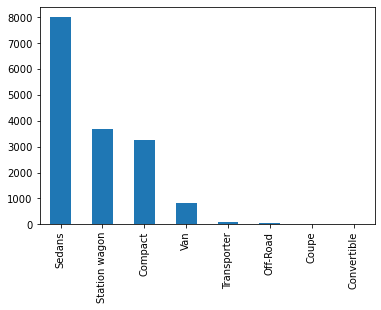

In [295]:
df.body_type.value_counts(dropna = False).plot(kind = 'bar')

In [296]:
df.cylinders.value_counts(dropna = False)

4      8105
NaN    5680
3      2104
5        22
6         3
8         2
2         2
1         1
Name: cylinders, dtype: int64

In [297]:
df.drop(columns = 'cylinders', inplace = True)

In [298]:
df.gears.value_counts(dropna = False)

6      5822
NaN    4712
5      3240
7      1908
8       224
9         6
1         2
3         2
4         2
2         1
Name: gears, dtype: int64

In [299]:
df['gears'] = pd.to_numeric(df['gears'])

In [300]:
df['gears'] = df['gears'].fillna(df.groupby('make_model')['gears'].transform('median'))

In [301]:
df.gears.value_counts(dropna = False)

6.0    9361
5.0    4412
7.0    1908
8.0     224
9.0       6
4.0       2
3.0       2
1.0       2
2.0       1
NaN       1
Name: gears, dtype: int64

In [302]:
df.groupby('make_model')['gears'].median()

make_model
Audi A1           6.0
Audi A2           NaN
Audi A3           6.0
Opel Astra        6.0
Opel Corsa        5.0
Opel Insignia     6.0
Renault Clio      5.0
Renault Duster    6.0
Renault Espace    6.0
Name: gears, dtype: float64

In [303]:
df.gears.fillna(5, inplace = True)

In [304]:
df.gears.value_counts(dropna = False)

6.0    9361
5.0    4413
7.0    1908
8.0     224
9.0       6
4.0       2
3.0       2
1.0       2
2.0       1
Name: gears, dtype: int64

In [305]:
df[df['gears'] == 4]

,make_model,body_type,price,vat,km,type,previous_owners,next_inspection,inspection_new,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,drive_chain,emission_label,gears,country_version,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,consumption_comb,co2_emission_new,displacement_cc,emission_class_new,register_age,fuel_new,hp_kw
15822,Renault Espace,Van,50950,VAT deductible,11.0,New,1.0,NaT,0,Grey,Metallic,Cloth,5,NaN,Automatic,NaN,NaN,4.0,Netherlands,1,0,1,1,0,1,0,1,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,7.6,116,1798.0,NaN,1.0,Benzine,165
15823,Renault Espace,Van,50950,VAT deductible,11.0,New,1.0,NaT,0,Grey,Metallic,Cloth,5,NaN,Automatic,NaN,NaN,4.0,Netherlands,1,0,1,1,0,1,0,1,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,7.6,116,1798.0,NaN,1.0,Benzine,165


In [306]:
df.gears.iloc[15822] = 7
df.gears.iloc[15823] = 7

In [307]:
df.gears.value_counts(dropna = False)

6.0    9361
5.0    4413
7.0    1910
8.0     224
9.0       6
3.0       2
1.0       2
2.0       1
Name: gears, dtype: int64

In [308]:
df[df['gears'] == 3]

,make_model,body_type,price,vat,km,type,previous_owners,next_inspection,inspection_new,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,drive_chain,emission_label,gears,country_version,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,consumption_comb,co2_emission_new,displacement_cc,emission_class_new,register_age,fuel_new,hp_kw
15817,Renault Espace,Van,54204,VAT deductible,11.0,New,1.0,NaT,0,White,Metallic,Part leather,5,NaN,Automatic,NaN,NaN,3.0,Netherlands,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,5.4,116,1997.0,NaN,1.0,Diesel,146
15845,Renault Espace,Van,46660,VAT deductible,11.0,New,1.0,NaT,0,White,NaN,Part leather,5,NaN,Automatic,NaN,NaN,3.0,Netherlands,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,5.1,116,1997.0,NaN,1.0,Diesel,118


In [309]:
df.gears.iloc[15817] = 7
df.gears.iloc[15845] = 7

In [310]:
df[df['gears'] == 1]

,make_model,body_type,price,vat,km,type,previous_owners,next_inspection,inspection_new,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,drive_chain,emission_label,gears,country_version,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,consumption_comb,co2_emission_new,displacement_cc,emission_class_new,register_age,fuel_new,hp_kw
8921,Opel Corsa,Compact,11000,VAT deductible,24000.0,Used,1.0,NaT,0,Blue,Metallic,"Cloth, Black",5,5,Semi-automatic,front,NaN,1.0,Belgium,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,4.8,112,1398.0,Euro 6,2.0,Benzine,66
14375,Renault Clio,Compact,23990,None,10.0,Demonstration,1.0,NaT,0,White,NaN,NaN,4,NaN,Automatic,NaN,NaN,1.0,Austria,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,NaN,116,1618.0,NaN,2.0,Benzine,147


In [311]:
df.gears.iloc[8921] = 5
df.gears.iloc[14375] = 6

In [312]:
df[df['gears'] == 2]

,make_model,body_type,price,vat,km,type,previous_owners,next_inspection,inspection_new,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,drive_chain,emission_label,gears,country_version,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,consumption_comb,co2_emission_new,displacement_cc,emission_class_new,register_age,fuel_new,hp_kw
9812,Opel Corsa,Sedans,9880,VAT deductible,19247.0,Used,1.0,NaT,0,Grey,Metallic,"Cloth, Black",5,NaN,Manual,NaN,NaN,2.0,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,NaN,116,1229.0,Euro 6,2.0,Benzine,51


In [313]:
df.gears.iloc[9812] = 5

In [314]:
df[df['gears'] == 9]

,make_model,body_type,price,vat,km,type,previous_owners,next_inspection,inspection_new,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,drive_chain,emission_label,gears,country_version,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,consumption_comb,co2_emission_new,displacement_cc,emission_class_new,register_age,fuel_new,hp_kw
15812,Renault Espace,Van,54982,VAT deductible,11.0,New,1.0,NaT,0,White,Metallic,Part leather,5,NaN,Automatic,NaN,NaN,9.0,Netherlands,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,7.6,116,1798.0,NaN,1.0,Benzine,165
15814,Renault Espace,Van,54982,VAT deductible,11.0,New,1.0,NaT,0,White,Metallic,Part leather,5,NaN,Automatic,NaN,NaN,9.0,Netherlands,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,7.6,116,1798.0,NaN,1.0,Benzine,165
15824,Renault Espace,Van,52711,VAT deductible,11.0,New,1.0,NaT,0,Grey,Metallic,Part leather,5,NaN,Automatic,NaN,NaN,9.0,Netherlands,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,7.4,116,1798.0,NaN,1.0,Benzine,165
15827,Renault Espace,Van,52711,VAT deductible,11.0,New,1.0,NaT,0,Grey,Metallic,Part leather,5,NaN,Automatic,NaN,NaN,9.0,Netherlands,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,7.4,116,1798.0,NaN,1.0,Benzine,165
15869,Renault Espace,Van,49100,VAT deductible,11.0,New,1.0,NaT,0,White,NaN,Part leather,5,NaN,Automatic,NaN,NaN,9.0,Netherlands,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,5.3,116,1997.0,NaN,1.0,Diesel

In [315]:
idx_lst = list(df[df['gears'] == 9].index)

In [316]:
idx_lst

[15812, 15814, 15824, 15827, 15869, 15876]

In [317]:
for i in idx_lst:
    df.gears.iloc[i] = 7

<AxesSubplot:>

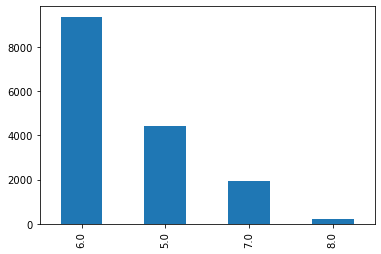

In [318]:
df.gears.value_counts(dropna = False).plot(kind = 'bar')

In [319]:
df.type.value_counts(dropna = False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: type, dtype: int64

In [320]:
df[df['type'].isnull()]

,make_model,body_type,price,vat,km,type,previous_owners,next_inspection,inspection_new,body_color,paint_type,upholstery,nr_of_doors,nr_of_seats,gearing_type,drive_chain,emission_label,gears,country_version,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,consumption_comb,co2_emission_new,displacement_cc,emission_class_new,register_age,fuel_new,hp_kw
2765,Audi A3,Sedans,17900,None,115137.0,NaN,2.0,NaT,0,White,NaN,"Cloth, Other",5,5,Automatic,front,1 (No sticker),6.0,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,4.5,118,1968.0,Euro 6,4.0,Diesel,110
5237,Audi A3,Sedans,25400,None,NaN,NaN,1.0,NaT,0,Grey,NaN,"Cloth, Other",5,5,Automatic,front,1 (No sticker),7.0,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,3.9,103,1598.0,Euro 6,NaN,Diesel,85


In [321]:
df.type.fillna('Used', inplace = True)

<AxesSubplot:>

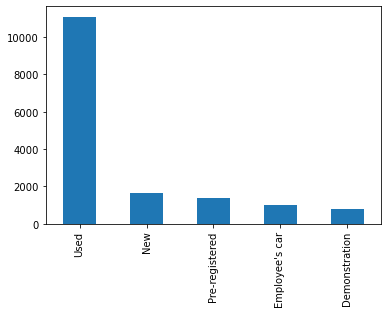

In [322]:
df.type.value_counts(dropna = False).plot(kind='bar')

In [323]:
df.upholstery.value_counts(dropna = False)

Cloth, Black           5821
NaN                    3720
Part leather, Black    1121
Cloth                  1005
Cloth, Grey             891
Cloth, Other            639
Full leather, Black     575
Black                   491
Grey                    273
Other, Other            182
Part leather            140
Full leather            139
Part leather, Grey      116
Full leather, Brown     116
Other, Black            110
Full leather, Other      72
Full leather, Grey       67
Part leather, Other      65
Other                    56
Part leather, Brown      50
alcantara, Black         47
Full leather, Beige      36
Velour, Black            36
Cloth, Brown             28
Velour                   16
Other, Grey              15
Cloth, Beige             13
Brown                    12
Cloth, Blue              12
Cloth, White              8
Velour, Grey              8
alcantara, Grey           6
Cloth, Red                5
Other, Yellow             4
Part leather, Red         3
Beige               

In [324]:
df.upholstery.str.contains('leather|alcantara', case = False, regex = True).value_counts(dropna = False)

False    9634
NaN      3720
True     2565
Name: upholstery, dtype: int64

In [325]:
df.upholstery.str.contains('leather|alcantara', case = False, regex = True).value_counts().sum()

12199

In [326]:
df.upholstery.fillna("Cloth", limit = 1000, inplace = True)
df.upholstery.fillna("Leather", limit = 410, inplace = True)
df.upholstery.fillna("Cloth", limit = 1000, inplace = True)
df.upholstery.fillna("Leather", limit = 410, inplace = True)
df.upholstery.fillna("Cloth", limit = 900, inplace = True)

In [327]:
upholstery_bool_list = df['upholstery'].str.contains('leather|alcantara', case = False, regex = True)

In [328]:
df.loc[upholstery_bool_list, 'upholstery'] = 'Part/Full Leather'

In [329]:
df.upholstery.loc[lambda x : x!= 'Part/Full Leather'] = 'Cloth'

<AxesSubplot:>

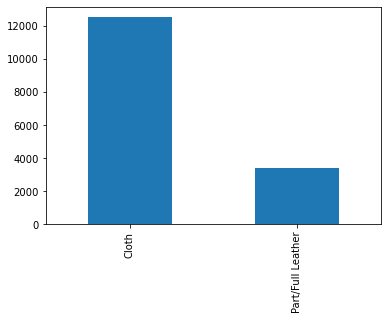

In [330]:
df.upholstery.value_counts(dropna = False).plot(kind = 'bar')

In [331]:
df.register_age.value_counts(dropna = False)

2.0    4522
4.0    3674
3.0    3273
1.0    2853
NaN    1597
Name: register_age, dtype: int64

In [332]:
df[df.register_age.isnull()]['km'].value_counts(dropna = False)

NaN        838
10.0       369
1.0        146
5.0         58
20.0        32
15.0        21
0.0         19
11.0        12
8.0         11
50.0        10
12.0         8
100.0        8
7.0          7
9.0          4
3.0          4
4.0          3
30.0         3
25.0         3
250.0        3
3000.0       2
39962.0      2
2.0          2
22627.0      2
60.0         1
6.0          1
784.0        1
196.0        1
40.0         1
6100.0       1
85000.0      1
281.0        1
11200.0      1
11000.0      1
19500.0      1
325.0        1
5000.0       1
81800.0      1
68485.0      1
99.0         1
77.0         1
500.0        1
150.0        1
142.0        1
20768.0      1
89982.0      1
89692.0      1
32084.0      1
497.0        1
141.0        1
4500.0       1
3500.0       1
34164.0      1
4307.0       1
Name: km, dtype: int64

In [333]:
df[df.register_age.isnull()]['km'].mean()

934.4967061923584

In [334]:
df[df.register_age.isnull()]['km'].median()

10.0

In [335]:
df.register_age.fillna(0, inplace = True)

<AxesSubplot:>

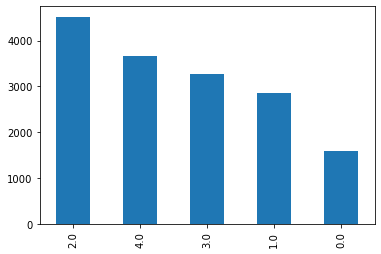

In [336]:
df.register_age.value_counts(dropna = False).plot(kind = 'bar')

In [337]:
df.km.value_counts(dropna = False)

10.0       1045
NaN        1024
1.0         367
5.0         170
50.0        148
           ... 
8329.0        1
267.0         1
1060.0        1
73652.0       1
49320.0       1
Name: km, Length: 6690, dtype: int64

In [338]:
df.groupby('register_age')['km'].transform('mean')

0        77442.520958
1        41754.940709
2        77442.520958
3        77442.520958
4        77442.520958
             ...     
15914      934.496706
15915     2085.355137
15916     2085.355137
15917     2085.355137
15918     2085.355137
Name: km, Length: 15919, dtype: float64

In [339]:
df['km'] = df['km'].fillna(df.groupby('register_age')['km'].transform('mean'))

C:\Users\calis\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


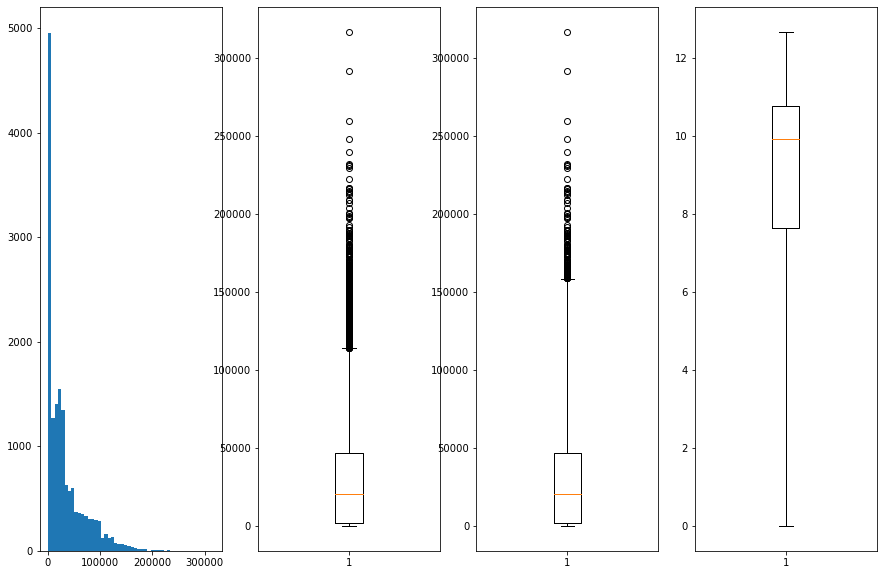

In [340]:
plt.figure(figsize = (15, 10))
plt.subplot(1,4,1)
plt.hist(df.km, bins = 50)

plt.subplot(1,4,2)
plt.boxplot(df.km)

plt.subplot(1,4,3)
plt.boxplot(df.km, whis = 2.5)

plt.subplot(1,4,4)
plt.boxplot(np.log(df.km), whis = 2.5)

plt.show()

In [341]:
df.km.sort_values(ascending = False).head()

9279     317000.0
3003     291800.0
5712     260000.0
6224     248000.0
15277    240000.0
Name: km, dtype: float64

In [342]:
df.vat.value_counts(dropna = False)

VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: vat, dtype: int64

In [343]:
df.vat.fillna(method = 'ffill', inplace = True)

<AxesSubplot:>

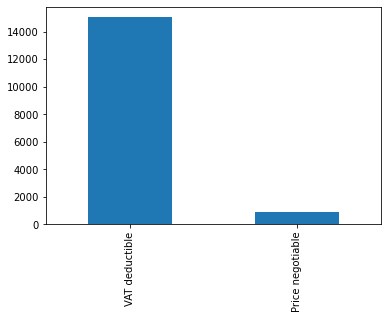

In [344]:
df.vat.value_counts(dropna = False).plot(kind = 'bar')

In [345]:
df.next_inspection.value_counts(dropna = False, normalize = True)

NaT           0.777938
2021-06-01    0.029587
2021-03-01    0.013192
2021-05-01    0.011307
2021-04-01    0.010742
                ...   
2016-04-01    0.000063
1955-01-01    0.000063
1999-01-01    0.000063
2017-05-01    0.000063
2016-05-01    0.000063
Name: next_inspection, Length: 78, dtype: float64

In [346]:
df.drop(columns = 'next_inspection', inplace = True)

In [347]:
df.paint_type.value_counts(dropna = False, normalize = True)

Metallic       0.615240
NaN            0.362586
Uni/basic      0.021798
Perl effect    0.000377
Name: paint_type, dtype: float64

In [348]:
df.drop(columns = 'paint_type', inplace = True)

In [349]:
df.country_version.value_counts(dropna = False)

NaN               8333
Germany           4502
Italy             1038
European Union     507
Netherlands        464
Spain              325
Belgium            314
Austria            208
Czech Republic      52
Poland              49
France              38
Denmark             33
Hungary             28
Japan                8
Croatia              4
Slovakia             4
Sweden               3
Romania              2
Bulgaria             2
Slovenia             1
Switzerland          1
Serbia               1
Egypt                1
Luxembourg           1
Name: country_version, dtype: int64

In [350]:
df.drop(columns = 'country_version', inplace = True)

In [351]:
df.emission_label.value_counts(dropna = False)

NaN               11974
4 (Green)          3553
1 (No sticker)      381
5 (Blue)              8
3 (Yellow)            2
2 (Red)               1
Name: emission_label, dtype: int64

In [352]:
df.drop(columns = 'emission_label', inplace = True)

In [353]:
df.consumption_comb.value_counts(dropna = False)

NaN     1925
5.40     770
3.90     733
4.00     717
5.10     657
        ... 
5.45       2
7.50       1
9.10       1
4.55       1
1.20       1
Name: consumption_comb, Length: 66, dtype: int64

In [356]:
df.consumption_comb.sort_values().head(55).unique()

array([0. , 1. , 1.2, 1.6, 3. ])

In [357]:
df.consumption_comb.sort_values().tail(55).unique()

array([nan])

In [359]:
consumption_outlier = df.consumption_comb.isin([0.00, 1.00, 1.20, 1.60])

In [361]:
consumption_outlier.value_counts()

False    15876
True        43
Name: consumption_comb, dtype: int64

In [362]:
df.loc[consumption_outlier, 'consumption_comb'] = np.nan

In [365]:
df.groupby('make_model')['consumption_comb'].median()

make_model
Audi A1           4.4
Audi A2           4.9
Audi A3           4.1
Opel Astra        4.6
Opel Corsa        5.4
Opel Insignia     5.5
Renault Clio      5.0
Renault Duster    NaN
Renault Espace    4.7
Name: consumption_comb, dtype: float64

In [364]:
df[df['make_model'] == 'Renault Duster'].shape[0]

34

In [366]:
df['consumption_comb'] = df.consumption_comb.fillna(df.groupby('make_model')['consumption_comb'].transform('mean'))

In [367]:
df.consumption_comb.isnull().sum()

34

In [368]:
df['consumption_comb'].mean()

4.843707403948365

In [369]:
df['consumption_comb'] = df.consumption_comb.fillna(df['consumption_comb'].mean())

In [370]:
df.consumption_comb.isnull().sum()

0

In [372]:
df.consumption_comb.sort_values().tail(44)

8319     7.8
8326     7.8
11432    7.8
8268     7.8
8321     7.8
8270     7.8
11219    7.9
12620    7.9
11221    7.9
10548    8.0
10571    8.0
12654    8.0
10744    8.0
10507    8.0
3609     8.1
3608     8.1
10515    8.3
3600     8.3
3599     8.3
3598     8.3
5161     8.3
3590     8.3
3587     8.3
3601     8.3
3596     8.3
3604     8.3
3603     8.3
3592     8.3
3649     8.3
3605     8.3
3606     8.3
3610     8.3
3593     8.3
3648     8.3
3602     8.3
3595     8.3
12422    8.6
12530    8.6
12553    8.6
10789    8.6
10817    8.7
12529    8.7
12054    8.7
10771    9.1
Name: consumption_comb, dtype: float64

In [373]:
df.consumption_comb.describe()

count    15919.000000
mean         4.843707
std          0.859226
min          3.000000
25%          4.200000
50%          4.800000
75%          5.400000
max          9.100000
Name: consumption_comb, dtype: float64

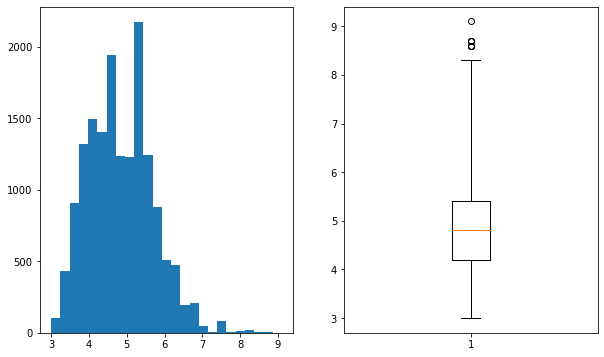

In [375]:
plt.figure(figsize = (10, 6))
plt.subplot(1,2,1)
plt.hist(df.consumption_comb, bins = 25)
plt.subplot(1,2,2)
plt.boxplot(df.consumption_comb, whis = 2.5)

plt.show()

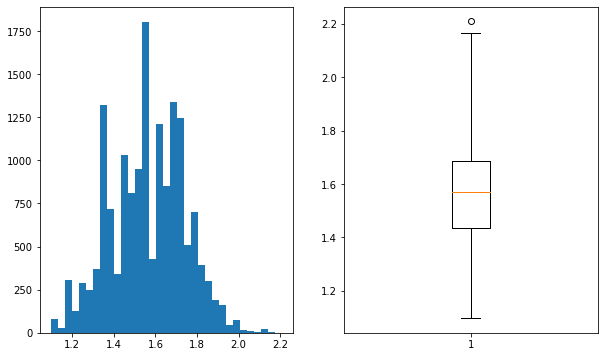

In [376]:
plt.figure(figsize = (10, 6))
plt.subplot(1,2,1)
plt.hist(np.log(df.consumption_comb), bins = 33)
plt.subplot(1,2,2)
plt.boxplot(np.log(df.consumption_comb), whis = 2)

plt.show()

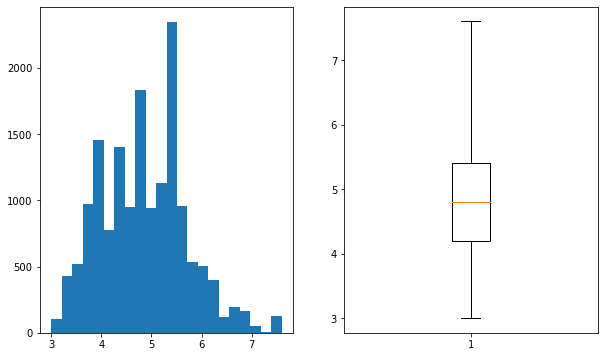

In [382]:
plt.figure(figsize = (10, 6))
plt.subplot(1,2,1)
plt.hist(mstats.winsorize(df.consumption_comb, (0.003)), bins = 22)
plt.subplot(1,2,2)
plt.boxplot(mstats.winsorize(df.consumption_comb, (0.003)), whis = 2)

plt.show()

In [383]:
df.drive_chain.value_counts(dropna = False)

front    8886
NaN      6858
4WD       171
rear        4
Name: drive_chain, dtype: int64

In [384]:
fill_most(df, 'make_model', 'drive_chain')

<AxesSubplot:>

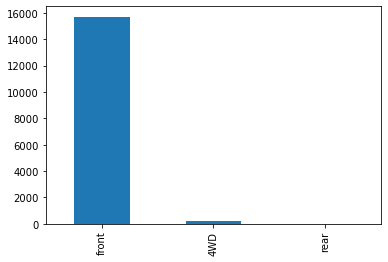

In [386]:
df.drive_chain.value_counts(dropna = False).plot(kind = 'bar')

In [390]:
df.displacement_cc.isnull().sum()

496

In [391]:
fill_most(df, 'make_model', 'displacement_cc')

In [392]:
df.displacement_cc.isnull().sum()

0

In [393]:
df.displacement_cc.describe()

count    15919.000000
mean      1426.172561
std        329.676109
min          1.000000
25%       1229.000000
50%       1461.000000
75%       1598.000000
max      16000.000000
Name: displacement_cc, dtype: float64

In [398]:
df.sort_values(by = ['displacement_cc'], ascending = False)['displacement_cc'].head(44)

10932    16000.0
7169     15898.0
10771     2967.0
3592      2480.0
3609      2480.0
3608      2480.0
3606      2480.0
3605      2480.0
3603      2480.0
3648      2480.0
3602      2480.0
3601      2480.0
3610      2480.0
3604      2480.0
3649      2480.0
3590      2480.0
3600      2480.0
3599      2480.0
3598      2480.0
3593      2480.0
3595      2480.0
3587      2480.0
3596      2480.0
11978     2000.0
11988     2000.0
2903      2000.0
12520     2000.0
12519     2000.0
12503     2000.0
12181     2000.0
12938     2000.0
12414     2000.0
12518     2000.0
11977     2000.0
11800     2000.0
12226     2000.0
12945     2000.0
12179     2000.0
12170     2000.0
12521     2000.0
11234     2000.0
10556     2000.0
13027     2000.0
13029     2000.0
Name: displacement_cc, dtype: float64

In [399]:
df.sort_values(by = ['displacement_cc'], ascending = True)['displacement_cc'].head(55)

14315      1.0
12800      1.0
12798      1.0
12796      1.0
12484      1.0
12790      1.0
12786      1.0
12783      1.0
14327      1.0
12781      1.0
14326      1.0
14325      1.0
12769      1.0
12815      1.0
14324      1.0
12768      1.0
12750      1.0
14322      1.0
14321      1.0
12670      1.0
12604      1.0
14320      1.0
12467      1.0
12473      1.0
12554      1.0
12501      1.0
12499      1.0
14319      1.0
12823      1.0
14328      1.0
12849      1.0
13904      1.0
12848      1.0
12835      1.0
14314      1.0
14284      1.0
14198      2.0
10559      2.0
13912     54.0
10194    122.0
7812     139.0
7811     139.0
7810     139.0
7809     139.0
8128     140.0
15578    160.0
15579    160.0
15574    160.0
15575    160.0
15576    160.0
15577    160.0
13653    890.0
14702    898.0
14726    898.0
14703    898.0
Name: displacement_cc, dtype: float64

In [400]:
outlier_displacement = df.displacement_cc.isin([1,2,54,122,139,140,160, 16000, 15898])

In [401]:
df.loc[outlier_displacement, 'displacement_cc'] = np.nan

In [402]:
fill_most(df, 'make_model', 'displacement_cc')

<AxesSubplot:>

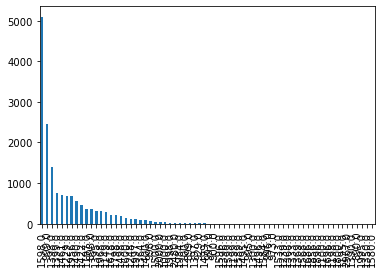

In [403]:
df.displacement_cc.value_counts(dropna = False).plot(kind = 'bar')

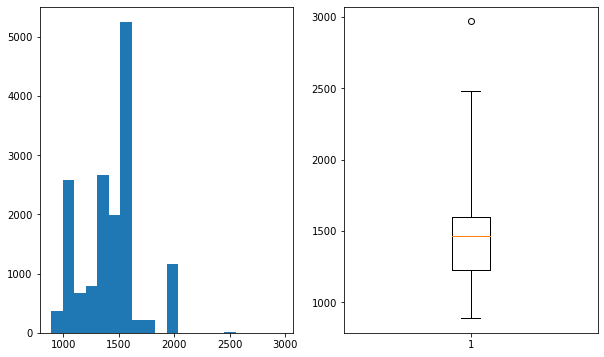

In [405]:
plt.figure(figsize = (10, 6))

plt.subplot(1,2,1)
plt.hist(df.displacement_cc, bins = 20)

plt.subplot(1,2,2)
plt.boxplot(df.displacement_cc, whis = 2.5)

plt.show()

In [408]:
df.emission_class_new.value_counts(dropna = False)

Euro 6    12173
NaN        3628
Euro 5       78
Euro 4       40
Name: emission_class_new, dtype: int64

In [409]:
df.drop(columns = 'emission_class_new', inplace = True)

In [410]:
df.nr_of_doors.value_counts(dropna = False)

5      11575
4       3079
3        832
2        219
NaN      212
1          1
7          1
Name: nr_of_doors, dtype: int64

In [411]:
fill_most(df, 'make_model', 'nr_of_doors')

In [412]:
df.nr_of_doors.value_counts(dropna = False)

5    11787
4     3079
3      832
2      219
1        1
7        1
Name: nr_of_doors, dtype: int64

In [416]:
df.nr_of_doors

0        5
1        3
2        4
3        3
4        5
        ..
15914    5
15915    5
15916    5
15917    5
15918    5
Name: nr_of_doors, Length: 15919, dtype: object

In [417]:
df['nr_of_doors'] = pd.to_numeric(df.nr_of_doors)

In [418]:
df[df['nr_of_doors'] == 7]

,make_model,body_type,price,vat,km,type,previous_owners,inspection_new,body_color,upholstery,nr_of_doors,nr_of_seats,gearing_type,drive_chain,gears,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,consumption_comb,co2_emission_new,displacement_cc,register_age,fuel_new,hp_kw
15202,Renault Espace,Van,21600,Price negotiable,78000.0,Used,1.0,0,Brown,Part/Full Leather,7,NaN,Automatic,front,6.0,1,0,1,1,0,1,0,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,1,1,0,0,0,1,0,1,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,1,1,1,1,0,0,0,1,1,1,1,0,1,1,0,1,1,1,0,1,4.6,120,1598.0,4.0,Diesel,118


In [421]:
df.nr_of_doors.iloc[15202] = 5

In [422]:
df.nr_of_doors.iloc[15202]

5

In [423]:
df[df['nr_of_doors'] == 1]

,make_model,body_type,price,vat,km,type,previous_owners,inspection_new,body_color,upholstery,nr_of_doors,nr_of_seats,gearing_type,drive_chain,gears,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,consumption_comb,co2_emission_new,displacement_cc,register_age,fuel_new,hp_kw
13782,Renault Clio,Compact,8500,VAT deductible,41493.0,Used,1.0,0,White,Cloth,1,NaN,Manual,front,5.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,4.714295,116,1461.0,4.0,Diesel,55


In [424]:
df.nr_of_doors.iloc[13782] = 5

In [425]:
df.nr_of_doors.iloc[13782]

5

<AxesSubplot:>

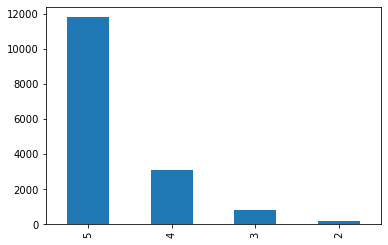

In [426]:
df.nr_of_doors.value_counts(dropna = False).plot(kind = 'bar')

<AxesSubplot:xlabel='nr_of_doors', ylabel='make_model'>

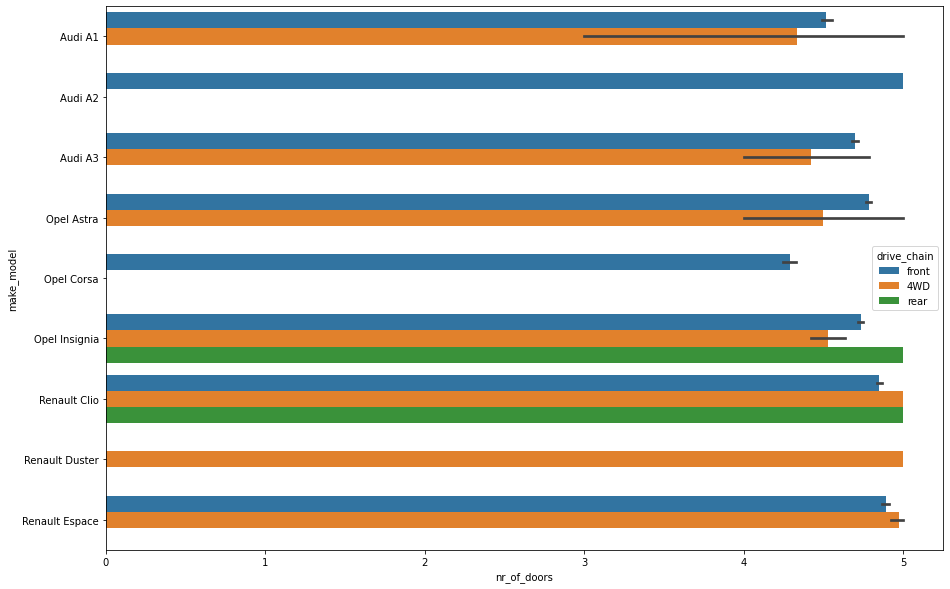

In [431]:
plt.figure(figsize = (15,10))

sns.barplot(x = 'nr_of_doors', y = 'make_model', hue = 'drive_chain', data = df)

In [432]:
df.nr_of_seats.value_counts(dropna = False)

5      13336
4       1125
NaN      977
7        362
2        116
6          2
3          1
Name: nr_of_seats, dtype: int64

In [433]:
fill_most(df, 'make_model', 'nr_of_seats')

In [434]:
df.nr_of_seats.value_counts(dropna = False)

5    14313
4     1125
7      362
2      116
6        2
3        1
Name: nr_of_seats, dtype: int64

In [436]:
df.nr_of_seats.dtype

dtype('O')

In [437]:
df['nr_of_seats'] = pd.to_numeric(df.nr_of_seats)

In [438]:
df[df['nr_of_seats'] == 6]

,make_model,body_type,price,vat,km,type,previous_owners,inspection_new,body_color,upholstery,nr_of_doors,nr_of_seats,gearing_type,drive_chain,gears,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,consumption_comb,co2_emission_new,displacement_cc,register_age,fuel_new,hp_kw
582,Audi A1,Compact,13500,VAT deductible,100000.000000,Used,1.0,0,White,Cloth,5,6,Manual,front,5.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.370955,116,1000.0,3.0,Benzine,70
15890,Renault Espace,Station wagon,42490,VAT deductible,934.496706,New,1.0,0,Black,Cloth,5,6,Automatic,front,6.0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,0,0,1,1,0,1,1,0,1,0,5.700000,168,1997.0,0.0,Diesel,147


In [441]:
df.nr_of_seats.iloc[582] = 5

In [442]:
df.nr_of_seats.iloc[15890] = 5

In [443]:
df[df['nr_of_seats'] == 3]

,make_model,body_type,price,vat,km,type,previous_owners,inspection_new,body_color,upholstery,nr_of_doors,nr_of_seats,gearing_type,drive_chain,gears,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,consumption_comb,co2_emission_new,displacement_cc,register_age,fuel_new,hp_kw
1636,Audi A1,Compact,23090,VAT deductible,9821.0,Used,1.0,1,Black,Part/Full Leather,2,3,Automatic,front,7.0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,5.8,134,1798.0,2.0,Benzine,141


In [444]:
df.nr_of_seats.iloc[1636] = 5

<AxesSubplot:>

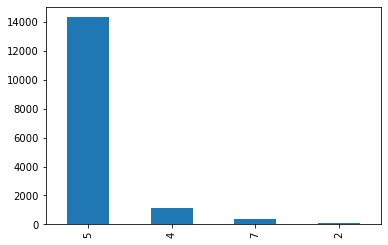

In [446]:
df.nr_of_seats.value_counts(dropna = False).plot(kind = 'bar')

In [448]:
df.fuel_new.value_counts(dropna = False)

Benzine    8550
Diesel     7299
LPG/CNG      70
Name: fuel_new, dtype: int64

Text(0.5, 0, 'Gears')

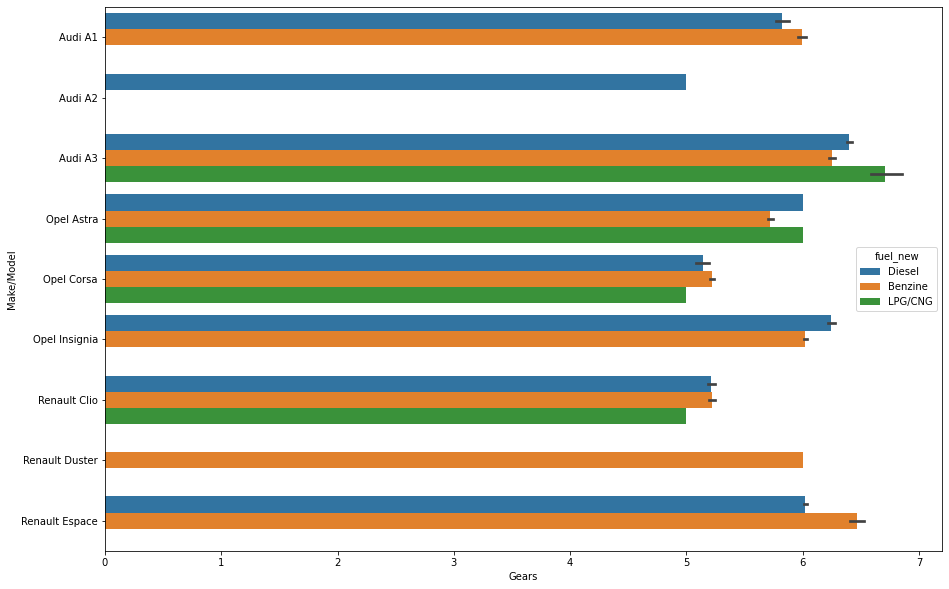

In [453]:
plt.figure(figsize = (15,10))

sns.barplot(x = 'gears', y = 'make_model', hue = 'fuel_new', data = df)

plt.ylabel('Make/Model')
plt.xlabel('Gears')

In [475]:
df['inspection_new'] = pd.to_numeric(df.inspection_new)

In [498]:
df['co2_emission_new'] = pd.to_numeric(df.co2_emission_new)

In [460]:
df.head()

,make_model,body_type,price,vat,km,type,previous_owners,inspection_new,body_color,upholstery,nr_of_doors,nr_of_seats,gearing_type,drive_chain,gears,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,consumption_comb,co2_emission_new,displacement_cc,register_age,fuel_new,hp_kw
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,2.0,1,Black,Cloth,5,5,Automatic,front,6.0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,3.8,99,1422.0,4.0,Diesel,66
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,1.0,0,Red,Cloth,3,4,Automatic,front,7.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,5.6,129,1798.0,3.0,Benzine,141
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,1.0,0,Black,Cloth,4,4,Automatic,front,6.0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,3.8,99,1598.0,4.0,Diesel,85
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,1.0,0,Brown,Cloth,3,4,Automatic,front,6.0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,3.8,99,1422.0,4.0,Diesel,66
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,1.0,1,Black,Cloth,5,5,Automatic,front,6.0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,4.1,109,1422.0,4.0,Diesel,66


In [509]:
miss_val = []

[miss_val.append(i) for i in df.columns if any(df[i].isnull())]

miss_val

[]

In [510]:
df.corr()

,price,km,previous_owners,inspection_new,nr_of_doors,nr_of_seats,gears,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,consumption_comb,co2_emission_new,displacement_cc,register_age,hp_kw
price,1.000000,-0.398879,-0.146354,0.008521,0.158966,0.246849,0.544467,0.082607,0.057097,0.303810,0.424525,0.046030,0.128464,-0.006138,0.283768,0.006086,0.260207,0.123129,0.328533,0.150386,0.021207,0.270063,0.029828,0.226764,0.314150,0.220062,0.275485,0.139464,0.339812,0.239917,0.375500,0.334422,0.279255,0.336625,0.309813,-0.019384,0.363681,0.301322,0.189958,0.002250,0.227874,0.164715,0.029984,0.006764,0.007078,0.030883,-0.079956,0.248499,0.083688,-0.023701,-0.075626,0.010220,0.146391,0.026945,-0.047749,0.199135,0.008186,0.044683,0.011599,-0.005304,0.035559,0.141916,0.028888,0.024376,0.112655,0.127467,0.163955,0.126837,0.018526,0.016204,0.143807,-0.020598,-0.041569,0.252938,0.223739,0.046856,0.375999,-0.048972,-0.072348,0.003263,0.088613,0.009966,0.006111,0.341335,0.063148,-0.053464,-0.036500,0.055810,-0.044802,0.121234,0.441617,0.374184,0.069466,-0.002773,-0.049074,0.000989,-0.005536,0.024847,0.060645,0.353227,0.182268,0.287227,0.020408,0.280732,-0.470204,0.667567
km,-0.398879,1.000000,0.143935,-0.049429,0.005529,-0.007652,-0.007540,0.010706,0.025984,0.035125,0.015594,0.058940,0.018654,0.019013,0.009396,-0.058876,0.126221,-0.071290,-0.040807,-0.112093,-0.094404,-0.046564,0.028605,-0.057355,-0.114425,0.040161,-0.035790,-0.041741,0.058337,0.041903,-0.085231,-0.070420,-0.033787,-0.023488,-0.057127,-0.003161,-0.088323,-0.082315,0.058941,0.115927,-0.020835,0.045581,0.059584,0.026666,0.009356,-0.032037,0.138138,-0.046507,-0.089520,-0.038769,0.075995,-0.002064,0.020070,0.027935,-0.052342,-0.084048,-0.022306,-0.082422,0.018715,0.011237,0.155467,-0.015199,0.020688,-0.003364,0.059096,0.012658,-0.013664,-0.069023,0.184593,-0.004138,-0.010501,0.068913,0.004421,0.039654,0.016877,0.118780,-0.014491,-0.016235,0.086296,-0.082946,0.054716,-0.032074,-0.100671,-0.103904,-0.006431,0.045563,0.109743,-0.038167,-0.033297,-0.038668,-0.098002,-0.060585,0.032522,-0.032055,-0.016116,0.104817,-0.035522,-0.037340,-0.007621,-

In [511]:
numeric_col = 'price,km,gears,co2_emission_new,previous_owners,inspection_new,consumption_comb,displacement_cc,register_age,hp_kw'.split(',')

In [512]:
oto_corr = df[numeric_col]

<AxesSubplot:>

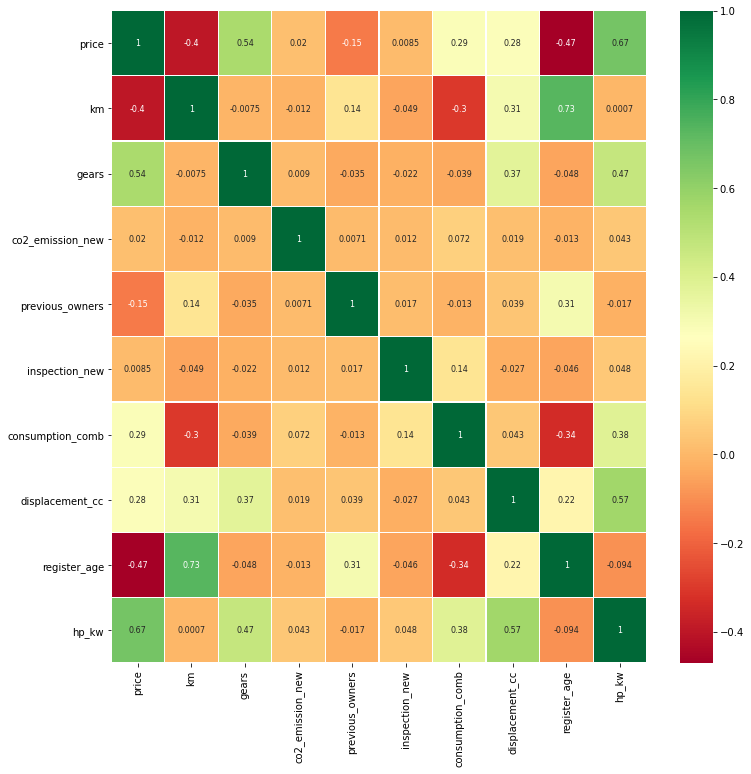

In [513]:
plt.figure(figsize = (12, 12))

sns.heatmap(oto_corr.corr(), annot = True, cmap = 'RdYlGn', linewidth = 0.2, annot_kws = {'size':8})

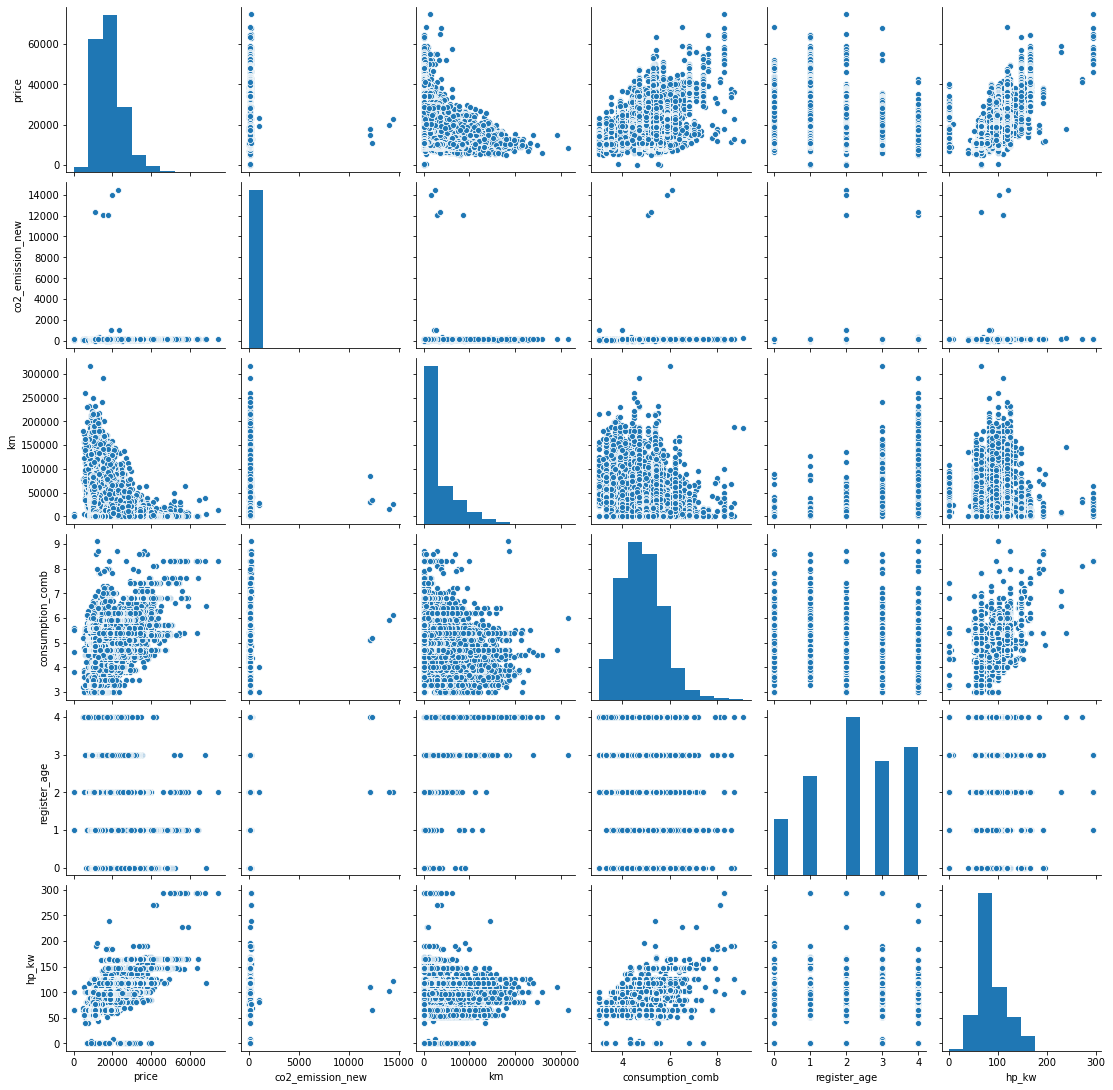

In [518]:
cols = ['price', 'co2_emission_new', 'km', 'consumption_comb', 'register_age', 'hp_kw']

sns.pairplot(df[cols], height = 2.5)

plt.show()

In [520]:
df.drop(columns = 'co2_emission_new', inplace = True)

In [521]:
df.price.describe()

count    15919.000000
mean     18019.896727
std       7386.169409
min         13.000000
25%      12850.000000
50%      16900.000000
75%      21900.000000
max      74600.000000
Name: price, dtype: float64

In [522]:
df.price.sort_values()

8594        13
8828       120
6066       255
8829       331
8827      4950
         ...  
15828    64332
3587     64900
3649     67600
15826    68320
3648     74600
Name: price, Length: 15919, dtype: int64

In [526]:
df[df['price'] < 500].index

Int64Index([6066, 8594, 8828, 8829], dtype='int64')

In [527]:
df.drop(df[df['price'] < 500].index, axis = 0).price.sort_values()

8827      4950
8825      4990
8826      5250
8824      5300
13770     5445
         ...  
15828    64332
3587     64900
3649     67600
15826    68320
3648     74600
Name: price, Length: 15915, dtype: int64

In [528]:
df.drop(df[df['price'] < 500].index, axis = 0, inplace = True)

In [529]:
df.shape

(15915, 114)

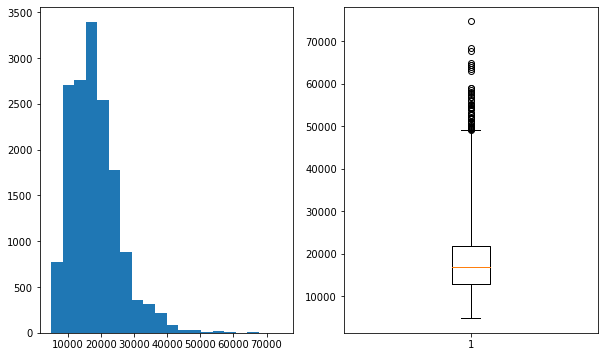

In [531]:
plt.figure(figsize = (10, 6))

plt.subplot(1,2,1)
plt.hist(df.price, bins = 20)

plt.subplot(1,2,2)
plt.boxplot(df.price, whis = 3)

plt.show()

In [534]:
df.hp_kw.sort_values().head(50)

13633    0
13864    0
11013    0
1269     0
11012    0
10910    0
13566    0
10909    0
8269     0
11163    0
13951    0
10586    0
13570    0
13572    0
13649    0
14048    0
14050    0
14057    0
14894    0
13646    0
13481    0
11183    0
12450    0
13476    0
13474    0
13471    0
13733    0
13422    0
13729    0
13488    0
13397    0
11237    0
2500     0
10167    0
13271    0
13726    0
13198    0
13158    0
4259     0
13144    0
12767    0
7670     0
14896    0
14895    0
14898    0
15261    0
15303    0
15347    0
15435    0
15438    0
Name: hp_kw, dtype: int64

In [536]:
df.hp_kw.loc[df.hp_kw < 40] = np.nan

In [538]:
df.hp_kw.isnull().sum()

110

In [540]:
df.hp_kw.fillna(df.groupby('make_model')['hp_kw'].transform('median'), inplace = True)

In [541]:
df.hp_kw.isnull().sum()

0

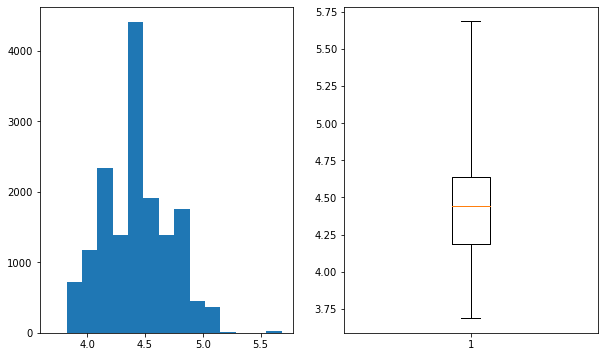

In [542]:
plt.figure(figsize = (10, 6))

plt.subplot(1,2,1)
plt.hist(np.log(df.hp_kw), bins = 15)

plt.subplot(1,2,2)
plt.boxplot(np.log(df.hp_kw), whis = 2.5)

plt.show()

In [544]:
df.hp_kw.sort_values().head(55)

13759    40.0
8857     40.0
8408     44.0
9781     51.0
9159     51.0
10288    51.0
10289    51.0
10290    51.0
10291    51.0
10292    51.0
9158     51.0
9382     51.0
10294    51.0
10295    51.0
10296    51.0
10297    51.0
10298    51.0
10300    51.0
10301    51.0
10302    51.0
10303    51.0
10304    51.0
10305    51.0
10306    51.0
10287    51.0
10286    51.0
10285    51.0
10284    51.0
9166     51.0
10268    51.0
10269    51.0
9165     51.0
10270    51.0
10271    51.0
9371     51.0
9164     51.0
10272    51.0
10273    51.0
10274    51.0
10275    51.0
10276    51.0
10277    51.0
10278    51.0
10279    51.0
10280    51.0
10281    51.0
10282    51.0
9376     51.0
9161     51.0
9160     51.0
10283    51.0
10307    51.0
9383     51.0
9384     51.0
10308    51.0
Name: hp_kw, dtype: float64

In [545]:
df.shape

(15915, 114)

In [546]:
df.head()

,make_model,body_type,price,vat,km,type,previous_owners,inspection_new,body_color,upholstery,nr_of_doors,nr_of_seats,gearing_type,drive_chain,gears,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,consumption_comb,displacement_cc,register_age,fuel_new,hp_kw
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,2.0,1,Black,Cloth,5,5,Automatic,front,6.0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,3.8,1422.0,4.0,Diesel,66.0
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,1.0,0,Red,Cloth,3,4,Automatic,front,7.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,5.6,1798.0,3.0,Benzine,141.0
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,1.0,0,Black,Cloth,4,4,Automatic,front,6.0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,3.8,1598.0,4.0,Diesel,85.0
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,1.0,0,Brown,Cloth,3,4,Automatic,front,6.0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,3.8,1422.0,4.0,Diesel,66.0
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,1.0,1,Black,Cloth,5,5,Automatic,front,6.0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,4.1,1422.0,4.0,Diesel,66.0


In [547]:
df2 = pd.get_dummies(df)

In [548]:
df2.shape

(15915, 153)

In [549]:
df2.head()

,price,km,previous_owners,inspection_new,nr_of_doors,nr_of_seats,gears,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,consumption_comb,displacement_cc,register_age,hp_kw,make_model_Audi A1,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used,body_color_Beige,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Orange,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,upholstery_Cloth,upholstery_Part/Full Leather,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,drive_chain_4WD,drive_chain_front,drive_chain_rear,fuel_new_Benzine,fuel_new_Diesel,fuel_new_LPG/CNG
0,15770,56013.0,2.0,1,5,5,6.0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,3.8,1422.0,4.0,66.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
1,14500,80000.0,1.0,0,3,4,7.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,5.6,1798.0,3.0,141.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0
2,14640,83450.0,1.0,0,4,4,6.0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,3.8,1598.0,4.0,85.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
3,14500,73000.0,1.0,0,3,4,6.0,0,

In [550]:
df.to_csv('clean_data.csv', index = False)